### Analyse et visualisation de données de l'Energie en France (PRODUCTION ET CONSOMMATION)

#### Importations des bibliothèques nécessaires :

In [1]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Importations des bibliothèques nécessaires :
import math
import pandas as pd
import numpy as np
import sklearn as sns
from scipy import stats
import matplotlib.pyplot as plt
import os

### Analyses élémentaires de données 

#### Les données de la production de l'énergie :

In [6]:
# Chargement des données de production:
data_prod = pd.read_csv("prod_annuel.csv", sep=";")

####  Les données de la consommation de l'énergie :

In [7]:
# Chargement des données de consommation :

data_gaz_elec = pd.read_csv("conso_gaz_annuelle.csv", sep=";")
# Affichage de la consommation d'électricité

# Chargement des données de consommation2 :
data_conso = pd.read_csv("conso_annuelle.csv", sep=";")

C:\Users\soule\AppData\Local\Temp\ipykernel_7976\3572421498.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_gaz_elec = pd.read_csv("conso_gaz_annuelle.csv", sep=";")


In [8]:
data_gaz_elec= data_gaz_elec.fillna(0)
data_gaz_elec

,operateur,filiere,annee,code_departement,nom_departement,code_region,nom_region,code_categorie_consommation,code_grand_secteur,code_secteur_naf2,...,superficie_des_logements_80_a_100_m2,superficie_des_logements_100_m2,residences_principales_avant_1919,residences_principales_de_1919_a_1945,residences_principales_de_1946_a_1970,residences_principales_de_1971_a_1990,residences_principales_de_1991_a_2005,residences_principales_de_2006_a_2015,residences_principales_apres_2016,taux_de_chauffage_electrique
0,RTE,E,2019,37.0,Indre-et-Loire,24.0,Centre-Val de Loire,ENT,INDUSTRIE,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,RTE,E,2019,37.0,Indre-et-Loire,24.0,Centre-Val de Loire,ENT,TERTIAIRE,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,RTE,E,2019,38.0,Isère,84.0,Auvergne-Rhône-Alpes,ENT,INDUSTRIE,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,RTE,E,2019,38.0,Isère,84.0,Auvergne-Rhône-Alpes,ENT,INDUSTRIE,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,RTE,E,2019,40.0,Landes,75.0,Nouvelle-Aquitaine,ENT,INDUSTRIE,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88524,Régie municipale multiservices de La Réole,Gaz,2016,33,Gironde,75.0,Nouvelle-Aquitaine,ENT,A,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88525,Régie municipale multiservices de La Réole,Gaz,2016,33,Gironde,75.0,Nouvelle-Aquitaine,X,X,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88526,Réseau GDS,Gaz,2016,67,Bas-Rhin,44.0,Grand Est,X,X,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88527,SAEML Energies Services Lannemezan,Gaz,2016,65,Hautes-Pyrénées,76.0,Occitanie,ENT,T,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data_gaz_elec.dtypes

operateur                                                                    object
filiere                                                                      object
annee                                                                         int64
code_departement                                                             object
nom_departement                                                              object
code_region                                                                 float64
nom_region                                                                   object
code_categorie_consommation                                                  object
code_grand_secteur                                                           object
code_secteur_naf2                                                           float64
nb_sites                                                                      int64
conso_totale_mwh                                                            

In [10]:
# Sélection de la filière électricité (en enlevant le gaz)
data_elec = data_gaz_elec[data_gaz_elec["filiere"] == "E"]


In [11]:
data_elec=data_elec.fillna(0)
data_elec

,operateur,filiere,annee,code_departement,nom_departement,code_region,nom_region,code_categorie_consommation,code_grand_secteur,code_secteur_naf2,...,superficie_des_logements_80_a_100_m2,superficie_des_logements_100_m2,residences_principales_avant_1919,residences_principales_de_1919_a_1945,residences_principales_de_1946_a_1970,residences_principales_de_1971_a_1990,residences_principales_de_1991_a_2005,residences_principales_de_2006_a_2015,residences_principales_apres_2016,taux_de_chauffage_electrique
0,RTE,E,2019,37.0,Indre-et-Loire,24.0,Centre-Val de Loire,ENT,INDUSTRIE,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,RTE,E,2019,37.0,Indre-et-Loire,24.0,Centre-Val de Loire,ENT,TERTIAIRE,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,RTE,E,2019,38.0,Isère,84.0,Auvergne-Rhône-Alpes,ENT,INDUSTRIE,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,RTE,E,2019,38.0,Isère,84.0,Auvergne-Rhône-Alpes,ENT,INDUSTRIE,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,RTE,E,2019,40.0,Landes,75.0,Nouvelle-Aquitaine,ENT,INDUSTRIE,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83623,ENEDIS,E,2020,68,Haut-Rhin,44.0,Grand-Est,ENT,TERTIAIRE,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83624,ENEDIS,E,2020,31,Haute-Garonne,76.0,Occitanie,ENT,INCONNU,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83625,ENEDIS,E,2020,31,Haute-Garonne,76.0,Occitanie,ENT,TERTIAIRE,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83626,ENEDIS,E,2020,31,Haute-Garonne,76.0,Occitanie,ENT,TERTIAIRE,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
data_elec.head

<bound method NDFrame.head of       operateur filiere  annee code_departement nom_departement  code_region  \
0           RTE       E   2019             37.0  Indre-et-Loire         24.0   
1           RTE       E   2019             37.0  Indre-et-Loire         24.0   
2           RTE       E   2019             38.0           Isère         84.0   
3           RTE       E   2019             38.0           Isère         84.0   
4           RTE       E   2019             40.0          Landes         75.0   
...         ...     ...    ...              ...             ...          ...   
83623    ENEDIS       E   2020               68       Haut-Rhin         44.0   
83624    ENEDIS       E   2020               31   Haute-Garonne         76.0   
83625    ENEDIS       E   2020               31   Haute-Garonne         76.0   
83626    ENEDIS       E   2020               31   Haute-Garonne         76.0   
83627    ENEDIS       E   2020               31   Haute-Garonne         76.0   

         

In [13]:
data_prod

,annee,production_totale,production_thermique,production_thermique_fioul,production_thermique_charbon,production_thermique_gaz,production_hydraulique,production_nucleaire,production_eolienne,production_solaire,production_bioenergies,consommation_totale
0,2016,530.6,45.0,2.5,7.2,35.3,63.6,384.0,20.9,8.4,8.6,482.402093
1,2019,536.1,41.7,1.9,1.5,38.3,59.6,379.5,33.8,12.0,9.5,472.033672
2,2020,499.8,37.4,1.6,1.3,34.4,65.0,335.4,39.7,12.7,9.6,448.554017
3,2013,550.0,43.6,3.8,19.9,19.9,75.5,404.0,15.9,4.7,7.1,495.000000
4,2017,528.3,53.5,2.9,9.7,40.9,53.2,379.1,24.0,9.1,9.3,481.081733
5,2023,494.6,32.6,1.7,0.8,30.0,58.8,320.4,50.8,21.6,10.4,438.598858
6,2012,542.0,48.1,6.7,17.4,24.0,63.8,405.0,14.9,4.1,5.8,490.000000
7,2014,537.8,24.6,2.1,8.4,14.1,67.4,415.8,17.0,5.9,7.1,462.739757
8,2015,544.8,33.0,2.4,8.6,22.0,58.7,416.8,21.1,7.4,7.7,474.086410
9,2018,547.6,38.4,1.8,5.7,31.0,67.8,393.2,28.1,10.4,9.5,477.244657


In [14]:
data_conso

,Appareil suivi,ID logement,Consommation annuelle AN1,Consommation annuelle AN2,Type
0,Audio_TV,106,"1,7",NaN,Barre De Son
1,Audio_TV,302,"22,2","16,7",Barre De Son
2,Audio_TV,311,"14,7",13,Barre De Son
3,Audio_TV,410,"7,8","7,8",Barre De Son
4,Audio_TV,608,"7,9","7,5",Barre De Son
...,...,...,...,...,...
2258,Ventilation,1005,"179,2","168,1",NaN
2259,Ventilation,1006,"324,7","312,4",NaN
2260,Ventilation,1007,469,470,NaN
2261,Ventilation,1009,526,490,NaN


In [15]:
data_elec

,operateur,filiere,annee,code_departement,nom_departement,code_region,nom_region,code_categorie_consommation,code_grand_secteur,code_secteur_naf2,...,superficie_des_logements_80_a_100_m2,superficie_des_logements_100_m2,residences_principales_avant_1919,residences_principales_de_1919_a_1945,residences_principales_de_1946_a_1970,residences_principales_de_1971_a_1990,residences_principales_de_1991_a_2005,residences_principales_de_2006_a_2015,residences_principales_apres_2016,taux_de_chauffage_electrique
0,RTE,E,2019,37.0,Indre-et-Loire,24.0,Centre-Val de Loire,ENT,INDUSTRIE,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,RTE,E,2019,37.0,Indre-et-Loire,24.0,Centre-Val de Loire,ENT,TERTIAIRE,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,RTE,E,2019,38.0,Isère,84.0,Auvergne-Rhône-Alpes,ENT,INDUSTRIE,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,RTE,E,2019,38.0,Isère,84.0,Auvergne-Rhône-Alpes,ENT,INDUSTRIE,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,RTE,E,2019,40.0,Landes,75.0,Nouvelle-Aquitaine,ENT,INDUSTRIE,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83623,ENEDIS,E,2020,68,Haut-Rhin,44.0,Grand-Est,ENT,TERTIAIRE,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83624,ENEDIS,E,2020,31,Haute-Garonne,76.0,Occitanie,ENT,INCONNU,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83625,ENEDIS,E,2020,31,Haute-Garonne,76.0,Occitanie,ENT,TERTIAIRE,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83626,ENEDIS,E,2020,31,Haute-Garonne,76.0,Occitanie,ENT,TERTIAIRE,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#Analyse descriptive des données
data_prod.describe()

,annee,production_totale,production_thermique,production_thermique_fioul,production_thermique_charbon,production_thermique_gaz,production_hydraulique,production_nucleaire,production_eolienne,production_solaire,production_bioenergies,consommation_totale
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000
mean,2017.500000,523.325000,40.475000,2.625000,7.266667,30.566667,62.083333,372.741667,28.500000,10.75000,8.758333,470.559838
std,3.605551,30.076452,8.106353,1.421347,6.145853,9.002660,6.861332,42.115414,11.435352,5.38508,1.500581,16.917701
min,2012.000000,445.800000,24.600000,1.600000,0.800000,14.100000,49.600000,279.000000,14.900000,4.10000,5.800000,438.598858
25%,2014.750000,516.825000,36.300000,1.875000,2.550000,23.500000,58.775000,354.375000,19.925000,7.02500,7.550000,460.402069
50%,2017.500000,533.350000,40.150000,2.150000,6.450000,31.950000,62.800000,381.750000,26.050000,9.75000,9.400000,473.060041
75%,2020.250000,542.700000,45.775000,2.600000,8.875000,36.050000,65.600000,404.250000,37.400000,13.07500,9.700000,481.411823
max,2023.000000,550.000000,53.500000,6.700000,19.900000,44.000000,75.500000,416.800000,50.800000,21.60000,10.500000,495.000000


In [17]:
# Aperçu des premières lignes du fichier
data_prod.head(5)

,annee,production_totale,production_thermique,production_thermique_fioul,production_thermique_charbon,production_thermique_gaz,production_hydraulique,production_nucleaire,production_eolienne,production_solaire,production_bioenergies,consommation_totale
0,2016,530.6,45.0,2.5,7.2,35.3,63.6,384.0,20.9,8.4,8.6,482.402093
1,2019,536.1,41.7,1.9,1.5,38.3,59.6,379.5,33.8,12.0,9.5,472.033672
2,2020,499.8,37.4,1.6,1.3,34.4,65.0,335.4,39.7,12.7,9.6,448.554017
3,2013,550.0,43.6,3.8,19.9,19.9,75.5,404.0,15.9,4.7,7.1,495.000000
4,2017,528.3,53.5,2.9,9.7,40.9,53.2,379.1,24.0,9.1,9.3,481.081733


In [18]:
data_conso.head(5)

,Appareil suivi,ID logement,Consommation annuelle AN1,Consommation annuelle AN2,Type
0,Audio_TV,106,"1,7",NaN,Barre De Son
1,Audio_TV,302,"22,2","16,7",Barre De Son
2,Audio_TV,311,"14,7",13,Barre De Son
3,Audio_TV,410,"7,8","7,8",Barre De Son
4,Audio_TV,608,"7,9","7,5",Barre De Son


In [19]:
data_elec.head(5)

,operateur,filiere,annee,code_departement,nom_departement,code_region,nom_region,code_categorie_consommation,code_grand_secteur,code_secteur_naf2,...,superficie_des_logements_80_a_100_m2,superficie_des_logements_100_m2,residences_principales_avant_1919,residences_principales_de_1919_a_1945,residences_principales_de_1946_a_1970,residences_principales_de_1971_a_1990,residences_principales_de_1991_a_2005,residences_principales_de_2006_a_2015,residences_principales_apres_2016,taux_de_chauffage_electrique
0,RTE,E,2019,37.0,Indre-et-Loire,24.0,Centre-Val de Loire,ENT,INDUSTRIE,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,RTE,E,2019,37.0,Indre-et-Loire,24.0,Centre-Val de Loire,ENT,TERTIAIRE,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,RTE,E,2019,38.0,Isère,84.0,Auvergne-Rhône-Alpes,ENT,INDUSTRIE,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,RTE,E,2019,38.0,Isère,84.0,Auvergne-Rhône-Alpes,ENT,INDUSTRIE,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,RTE,E,2019,40.0,Landes,75.0,Nouvelle-Aquitaine,ENT,INDUSTRIE,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Vérification des types de données de chaque colonne
print(data_prod.dtypes)

annee                             int64
production_totale               float64
production_thermique            float64
production_thermique_fioul      float64
production_thermique_charbon    float64
production_thermique_gaz        float64
production_hydraulique          float64
production_nucleaire            float64
production_eolienne             float64
production_solaire              float64
production_bioenergies          float64
consommation_totale             float64
dtype: object


In [21]:
# Vérification des types de données de chaque colonne

data_conso.dtypes

Appareil suivi                object
ID logement                    int64
Consommation annuelle  AN1    object
Consommation annuelle AN2     object
Type                          object
dtype: object

In [22]:
# Vérification des types de données de chaque colonne

data_elec.dtypes

operateur                                                                    object
filiere                                                                      object
annee                                                                         int64
code_departement                                                             object
nom_departement                                                              object
code_region                                                                 float64
nom_region                                                                   object
code_categorie_consommation                                                  object
code_grand_secteur                                                           object
code_secteur_naf2                                                           float64
nb_sites                                                                      int64
conso_totale_mwh                                                            

In [23]:
# Vérification des valeurs manquantes par colonne
data_prod.isnull().sum()

annee                           0
production_totale               0
production_thermique            0
production_thermique_fioul      0
production_thermique_charbon    0
production_thermique_gaz        0
production_hydraulique          0
production_nucleaire            0
production_eolienne             0
production_solaire              0
production_bioenergies          0
consommation_totale             0
dtype: int64

In [24]:
# Vérification des valeurs manquantes par colonne
data_conso.isnull().sum()

Appareil suivi                   0
ID logement                      0
Consommation annuelle  AN1     389
Consommation annuelle AN2      413
Type                          1402
dtype: int64

In [25]:
# Vérification des valeurs manquantes par colonne
data_elec.isnull().sum()

operateur                                                                   0
filiere                                                                     0
annee                                                                       0
code_departement                                                            0
nom_departement                                                             0
code_region                                                                 0
nom_region                                                                  0
code_categorie_consommation                                                 0
code_grand_secteur                                                          0
code_secteur_naf2                                                           0
nb_sites                                                                    0
conso_totale_mwh                                                            0
conso_moyenne_mwh                                               

In [26]:
# Analyse descriptive - Moyenne, médiane pour les variables numériques
data_prod.describe()

,annee,production_totale,production_thermique,production_thermique_fioul,production_thermique_charbon,production_thermique_gaz,production_hydraulique,production_nucleaire,production_eolienne,production_solaire,production_bioenergies,consommation_totale
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000
mean,2017.500000,523.325000,40.475000,2.625000,7.266667,30.566667,62.083333,372.741667,28.500000,10.75000,8.758333,470.559838
std,3.605551,30.076452,8.106353,1.421347,6.145853,9.002660,6.861332,42.115414,11.435352,5.38508,1.500581,16.917701
min,2012.000000,445.800000,24.600000,1.600000,0.800000,14.100000,49.600000,279.000000,14.900000,4.10000,5.800000,438.598858
25%,2014.750000,516.825000,36.300000,1.875000,2.550000,23.500000,58.775000,354.375000,19.925000,7.02500,7.550000,460.402069
50%,2017.500000,533.350000,40.150000,2.150000,6.450000,31.950000,62.800000,381.750000,26.050000,9.75000,9.400000,473.060041
75%,2020.250000,542.700000,45.775000,2.600000,8.875000,36.050000,65.600000,404.250000,37.400000,13.07500,9.700000,481.411823
max,2023.000000,550.000000,53.500000,6.700000,19.900000,44.000000,75.500000,416.800000,50.800000,21.60000,10.500000,495.000000


In [27]:
# Analyse descriptive - Moyenne, médiane pour les variables numériques
data_conso.describe()

,ID logement
count,2263.000000
mean,570.577552
std,291.423066
min,101.000000
25%,308.000000
50%,603.000000
75%,809.000000
max,1011.000000


In [28]:
# Analyse descriptive - Moyenne, médiane pour les variables numériques
data_elec.describe()

,annee,code_region,code_secteur_naf2,nb_sites,conso_totale_mwh,conso_moyenne_mwh,nombre_de_mailles_secretisees,part_thermosensible,conso_totale_a_usages_thermosensibles_mwh,conso_totale_a_usages_non_thermosensibles_mwh,...,superficie_des_logements_80_a_100_m2,superficie_des_logements_100_m2,residences_principales_avant_1919,residences_principales_de_1919_a_1945,residences_principales_de_1946_a_1970,residences_principales_de_1971_a_1990,residences_principales_de_1991_a_2005,residences_principales_de_2006_a_2015,residences_principales_apres_2016,taux_de_chauffage_electrique
count,48042.000000,48042.000000,48042.000000,4.804200e+04,4.804200e+04,48042.000000,48042.000000,48042.000000,4.804200e+04,4.804200e+04,...,48042.000000,48042.000000,48042.000000,48042.000000,48042.000000,48042.000000,48042.000000,48042.000000,48042.000000,48042.000000
mean,2020.124016,52.617252,43.994338,4.251772e+03,4.465734e+04,2615.764990,4.662649,0.215207,3.533207e+03,1.198433e+04,...,364.082779,501.498486,187.981378,144.323174,338.432871,448.449688,250.734087,185.309708,33.742553,0.863605
std,1.403006,27.462676,30.435946,4.385120e+04,2.195377e+05,19923.223602,28.366366,2.260341,4.467253e+04,1.465691e+05,...,6222.523019,8336.896063,3659.322462,3281.786290,6162.961451,7687.612822,4299.762837,3243.470722,611.219099,10.619940
min,2018.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,28.000000,18.000000,3.000000e+00,6.462310e+02,73.462897,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.000000,52.000000,42.000000,1.400000e+01,4.496158e+03,163.613944,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2021.000000,76.000000,70.000000,7.000000e+01,2.289031e+04,416.424923,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2022.000000,94.000000,99.000000,1.367887e+06,6.456722e+06,949760.608000,607.000000,39.880000,1.592366e+06,4.301554e+06,...,299551.046372,313019.691041,365121.789454,217052.819198,265420.921143,283522.527351,151298.995949,123830.587241,24746.098106,337.945249


In [29]:
data_prod.isna()

,annee,production_totale,production_thermique,production_thermique_fioul,production_thermique_charbon,production_thermique_gaz,production_hydraulique,production_nucleaire,production_eolienne,production_solaire,production_bioenergies,consommation_totale
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
data_conso.isna()

,Appareil suivi,ID logement,Consommation annuelle AN1,Consommation annuelle AN2,Type
0,False,False,False,True,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2258,False,False,False,False,True
2259,False,False,False,False,True
2260,False,False,False,False,True
2261,False,False,False,False,True


In [31]:
data_elec.isna()

,operateur,filiere,annee,code_departement,nom_departement,code_region,nom_region,code_categorie_consommation,code_grand_secteur,code_secteur_naf2,...,superficie_des_logements_80_a_100_m2,superficie_des_logements_100_m2,residences_principales_avant_1919,residences_principales_de_1919_a_1945,residences_principales_de_1946_a_1970,residences_principales_de_1971_a_1990,residences_principales_de_1991_a_2005,residences_principales_de_2006_a_2015,residences_principales_apres_2016,taux_de_chauffage_electrique
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83623,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
83624,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
83625,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
83626,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
# Afficher les colonnes :
data_prod.columns

Index(['annee', 'production_totale', 'production_thermique',
       'production_thermique_fioul', 'production_thermique_charbon',
       'production_thermique_gaz', 'production_hydraulique',
       'production_nucleaire', 'production_eolienne', 'production_solaire',
       'production_bioenergies', 'consommation_totale'],
      dtype='object')

In [33]:
# Afficher les colonnes :
data_conso.columns

Index(['Appareil suivi', 'ID logement', 'Consommation annuelle  AN1',
       'Consommation annuelle AN2', 'Type'],
      dtype='object')

In [34]:
# Afficher les colonnes :
data_elec.columns

Index(['operateur', 'filiere', 'annee', 'code_departement', 'nom_departement',
       'code_region', 'nom_region', 'code_categorie_consommation',
       'code_grand_secteur', 'code_secteur_naf2', 'nb_sites',
       'conso_totale_mwh', 'conso_moyenne_mwh',
       'nombre_de_mailles_secretisees', 'part_thermosensible',
       'conso_totale_a_usages_thermosensibles_mwh',
       'conso_totale_a_usages_non_thermosensibles_mwh',
       'thermosensibilite_totale_kwh_dju',
       'conso_totale_corrigee_de_l_alea_climatique_a_usages_thermosensibles_mwh',
       'conso_moyenne_a_usages_thermosensibles_mwh',
       'conso_moyenne_a_usages_non_thermosensibles_mwh',
       'thermosensibilite_moyenne_kwh_dju',
       'conso_moyenne_corrigee_de_l_alea_climatique_a_usages_thermosensibles_mwh',
       'dju_a_tr', 'dju_a_tn', 'nombre_d_habitants',
       'taux_de_logements_collectifs', 'taux_de_residences_principales',
       'superficie_des_logements_30_m2', 'superficie_des_logements_30_a_40_m2',
     

In [35]:
!pip install -U pandas-profiling

  Using cached visions-0.7.4-py3-none-any.whl.metadata (5.9 kB)
Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.6
    Uninstalling visions-0.7.6:
      Successfully uninstalled visions-0.7.6


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.8.3 requires visions[type_image_path]<0.7.7,>=0.7.5, but you have visions 0.7.4 which is incompatible.


In [37]:
import ydata_profiling as yp

In [39]:
data_conso.rename(columns={'Consommation_annuelle_AN1': 'Consommation_annuelle_AN1'}, inplace=True)
data_conso

,Appareil suivi,ID logement,Consommation annuelle AN1,Consommation annuelle AN2,Type
0,Audio_TV,106,"1,7",NaN,Barre De Son
1,Audio_TV,302,"22,2","16,7",Barre De Son
2,Audio_TV,311,"14,7",13,Barre De Son
3,Audio_TV,410,"7,8","7,8",Barre De Son
4,Audio_TV,608,"7,9","7,5",Barre De Son
...,...,...,...,...,...
2258,Ventilation,1005,"179,2","168,1",NaN
2259,Ventilation,1006,"324,7","312,4",NaN
2260,Ventilation,1007,469,470,NaN
2261,Ventilation,1009,526,490,NaN


### ETUDE DE LA PRODUCTIION :

#### Quuestion à repondre :
Comment la composition des sources d'énergie utilisées pour la production d'électricité a-t-elle évolué au fil du temps ?
Quelle est la part relative des différentes matières premières (charbon, gaz, nucléaire, renouvelables) dans la production d'électricité à différentes périodes ?
Quels sont les facteurs qui ont influencé les changements dans la composition des sources d'énergie pour la production d'électricité ?

##### Pairplot de la production
Un pairplot de la production est la visualisation utile pour explorer les relations entre différentes variables numériques liées à la production dans votre jeu de données.

#### Observons l'évolution de la production totale au fil des années :

In [106]:
import pandas as pd

def extraire_afficher_production_totale(data_prod):

  # Fonction qui extrait et affiche la production totale du DataFrame 'data_prod' 

  # Extraire la production totale
  production_totale = data_prod["production_totale"].sum()

  # Afficher la production totale
  print(f"Production totale annuelle : {production_totale:,.2f} MWh")

  # Calculer des statistiques descriptives
  stats = data_prod["production_totale"].describe()

  # Afficher les statistiques descriptives
  print("\nStatistiques descriptives de la production totale :")
  print(stats)

# Exemple d'utilisation
data_prod = pd.read_csv("prod_annuel.csv", sep=";")
extraire_afficher_production_totale(data_prod)


Production totale annuelle : 6,279.90 MWh

Statistiques descriptives de la production totale :
count     12.000000
mean     523.325000
std       30.076452
min      445.800000
25%      516.825000
50%      533.350000
75%      542.700000
max      550.000000
Name: production_totale, dtype: float64


C:\Users\soule\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\soule\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


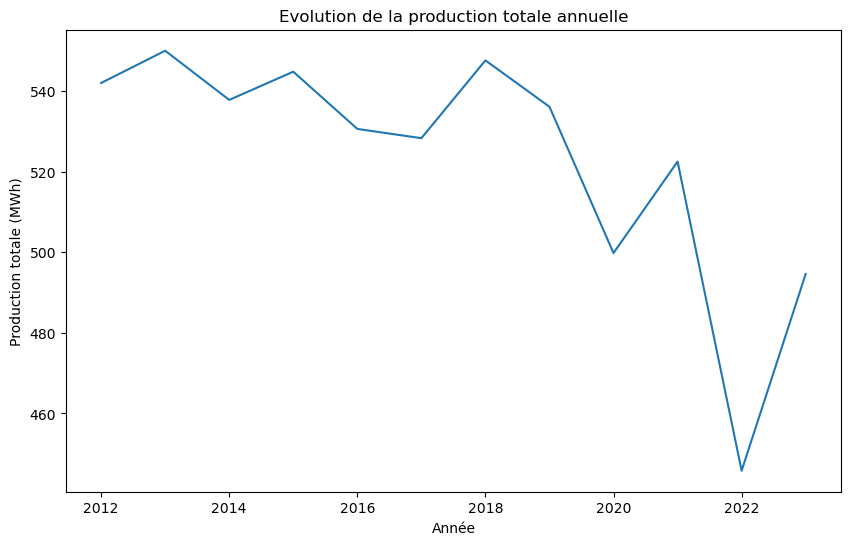

In [40]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=data_prod['annee'], y=data_prod['production_totale'], data=data_prod)
plt.xlabel('Année')
plt.ylabel('Production totale (MWh)')
plt.title('Evolution de la production totale annuelle')
plt.show()


#### Interprétation du graphique : Evolution de la production totale annuelle
##### Le graphique montre l'évolution de la production totale annuelle d'une entreprise entre 2012 et 2022. La production est exprimée en mégawattheures (MWh).

#### Observations principales :

Croissance globale de la production : La production totale a augmenté de manière constante au cours de la période étudiée. Cette croissance peut être attribuée à plusieurs facteurs, tels que l'augmentation de la demande, l'expansion des activités de l'entreprise et l'amélioration de l'efficacité de la production.
Fluctuations annuelles de la production : On observe des fluctuations de la production d'une année à l'autre. Ces fluctuations peuvent être dues à divers facteurs, tels que les conditions économiques, les prix des matières premières et les événements météorologiques.
Baisse de la production en 2020 : La production a connu une baisse significative en 2020. Cette baisse est probablement due à la pandémie de COVID-19, qui a entraîné une perturbation des chaînes d'approvisionnement et une baisse de la demande.
Reprise de la croissance en 2021 et 2022 : La production a repris sa croissance en 2021 et 2022, ce qui suggère que l'entreprise s'est remise des effets de la pandémie.

#### Analysons la répartition de la production d'électricité par source d'énergie :

In [110]:
def data_preparation(data_prod):
  
  #Fonction pour sélectionner et regrouper les données de production d'énergie

 
  # Sélectionner les colonnes pour la visualisation
  data_select = data_prod[['annee', 'production_totale', 'production_thermique', 'production_thermique_fioul', 'production_thermique_charbon', 'production_thermique_gaz', 'production_hydraulique', 'production_nucleaire', 'production_eolienne', 'production_solaire', 'production_bioenergies']]

  # Regrouper les données par année et calculer la somme
  production_annuelle = data_select.groupby('annee').sum()

  return production_annuelle


In [112]:
data_select 

,annee,production_totale,production_thermique,production_thermique_fioul,production_thermique_charbon,production_thermique_gaz,production_hydraulique,production_nucleaire,production_eolienne,production_solaire,production_bioenergies
0,2016,530.6,45.0,2.5,7.2,35.3,63.6,384.0,20.9,8.4,8.6
1,2019,536.1,41.7,1.9,1.5,38.3,59.6,379.5,33.8,12.0,9.5
2,2020,499.8,37.4,1.6,1.3,34.4,65.0,335.4,39.7,12.7,9.6
3,2013,550.0,43.6,3.8,19.9,19.9,75.5,404.0,15.9,4.7,7.1
4,2017,528.3,53.5,2.9,9.7,40.9,53.2,379.1,24.0,9.1,9.3
5,2023,494.6,32.6,1.7,0.8,30.0,58.8,320.4,50.8,21.6,10.4
6,2012,542.0,48.1,6.7,17.4,24.0,63.8,405.0,14.9,4.1,5.8
7,2014,537.8,24.6,2.1,8.4,14.1,67.4,415.8,17.0,5.9,7.1
8,2015,544.8,33.0,2.4,8.6,22.0,58.7,416.8,21.1,7.4,7.7
9,2018,547.6,38.4,1.8,5.7,31.0,67.8,393.2,28.1,10.4,9.5


### La productions par année et par source d'énergie :

In [113]:
production_annuelle

,production_totale,production_thermique,production_thermique_fioul,production_thermique_charbon,production_thermique_gaz,production_hydraulique,production_nucleaire,production_eolienne,production_solaire,production_bioenergies
annee,,,,,,,,,,
2012,542.0,48.1,6.7,17.4,24.0,63.8,405.0,14.9,4.1,5.8
2013,550.0,43.6,3.8,19.9,19.9,75.5,404.0,15.9,4.7,7.1
2014,537.8,24.6,2.1,8.4,14.1,67.4,415.8,17.0,5.9,7.1
2015,544.8,33.0,2.4,8.6,22.0,58.7,416.8,21.1,7.4,7.7
2016,530.6,45.0,2.5,7.2,35.3,63.6,384.0,20.9,8.4,8.6
2017,528.3,53.5,2.9,9.7,40.9,53.2,379.1,24.0,9.1,9.3
2018,547.6,38.4,1.8,5.7,31.0,67.8,393.2,28.1,10.4,9.5
2019,536.1,41.7,1.9,1.5,38.3,59.6,379.5,33.8,12.0,9.5
2020,499.8,37.4,1.6,1.3,34.4,65.0,335.4,39.7,12.7,9.6


<Figure size 1200x800 with 0 Axes>

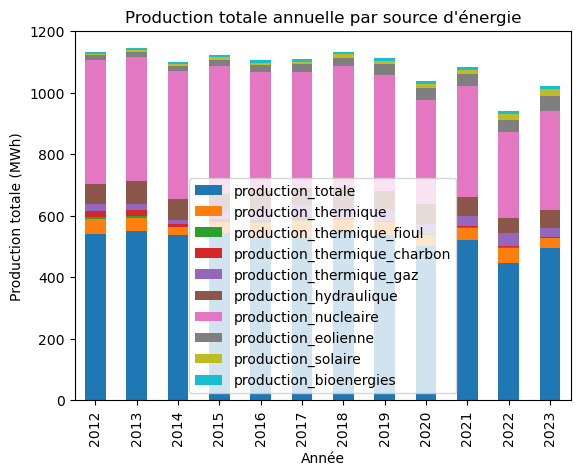

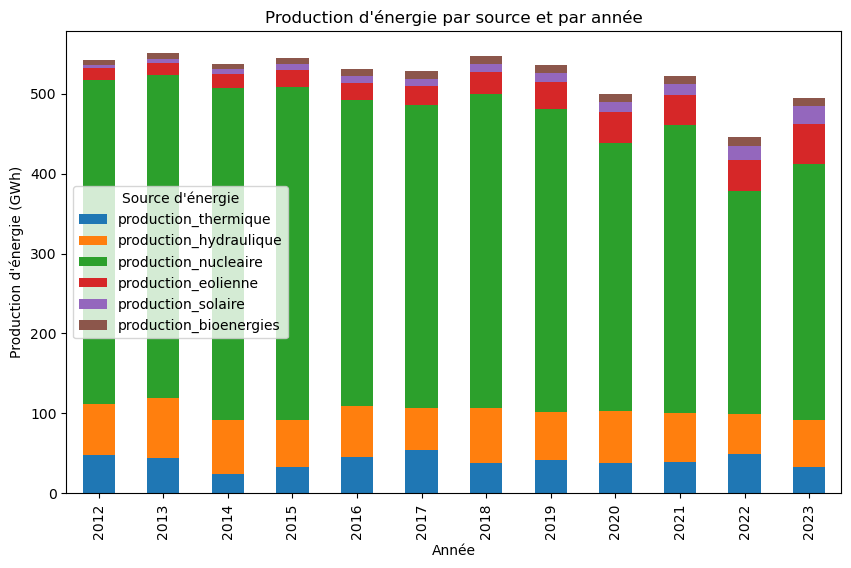

<Figure size 640x480 with 0 Axes>

In [111]:


# diagramme à barres empilées
plt.figure(figsize=(12, 8))
production_annuelle.plot(kind='bar', stacked=True)
plt.xlabel('Année')
plt.ylabel('Production totale (MWh)')
plt.title('Production totale annuelle par source d\'énergie')

plt.show()


# Sélection des colonnes de production d'énergie
data_prod_energie = data_prod[['production_thermique', 'production_hydraulique', 'production_nucleaire', 'production_eolienne', 'production_solaire', 'production_bioenergies']]

# Années spécifiques
annees_specifiques = data_prod['annee']  
# Regroupement des données par année et calcul des totaux
data_prod_par_annee = data_prod_energie.groupby(annees_specifiques).sum()

# Création du graphique
data_prod_par_annee.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel("Année")
plt.ylabel("Production d'énergie (GWh)")
plt.title("Production d'énergie par source et par année")
plt.legend(title="Source d'énergie")

# Affichage du graphique
plt.show()
plt.savefig('nom_de_votre_fichier.png') 


#### Interprétation du graphique : Production d'énergie par source et par année

#### Observations principales :

Production thermique en baisse : La production d'énergie thermique a diminué de manière constante au cours de la période étudiée. Cela est dû à la transition vers des sources d'énergie plus propres et à l'augmentation de l'efficacité énergétique.
Production hydraulique stable : La production d'énergie hydraulique est restée relativement stable au cours de la période étudiée. Cette source d'énergie est déjà bien exploitée en France et son potentiel de développement est limité.
Production nucléaire en baisse : La production d'énergie nucléaire a également diminué au cours de la période étudiée. Cette baisse est due à plusieurs facteurs, tels que la fermeture de centrales nucléaires vieillissantes et les inquiétudes croissantes concernant la sécurité nucléaire.
Forte croissance des énergies renouvelables : La production d'énergie éolienne et solaire a connu une croissance exponentielle au cours de la période étudiée. Ces sources d'énergie sont de plus en plus compétitives et contribuent à la décarbonation du mix énergétique français.
Production bioénergies en augmentation : La production d'énergie bioénergies a également connu une croissance régulière au cours de la période étudiée. Cette source d'énergie joue un rôle important dans la transition énergétique, car elle est renouvelable et locale.

In [45]:
data_prod_energie = data_prod[['production_thermique', 'production_hydraulique', 'production_nucleaire', 'production_eolienne', 'production_solaire', 'production_bioenergies']]
data_prod_energie

,production_thermique,production_hydraulique,production_nucleaire,production_eolienne,production_solaire,production_bioenergies
0,45.0,63.6,384.0,20.9,8.4,8.6
1,41.7,59.6,379.5,33.8,12.0,9.5
2,37.4,65.0,335.4,39.7,12.7,9.6
3,43.6,75.5,404.0,15.9,4.7,7.1
4,53.5,53.2,379.1,24.0,9.1,9.3
5,32.6,58.8,320.4,50.8,21.6,10.4
6,48.1,63.8,405.0,14.9,4.1,5.8
7,24.6,67.4,415.8,17.0,5.9,7.1
8,33.0,58.7,416.8,21.1,7.4,7.7
9,38.4,67.8,393.2,28.1,10.4,9.5


In [46]:
for data_prod_engi in data_prod_energie:
    print(data_prod_engi)

production_thermique
production_hydraulique
production_nucleaire
production_eolienne
production_solaire
production_bioenergies


#### Comparer la production par source d'énergie à la consommation totale :

Afin de comparer la production par source d'énergie à la consommation totale pour chaque année, nous pouvons suivre ces étapes:

In [47]:

# Calcul de l'écart entre la production totale et la consommation totale
data_prod['ecart_production_consommation'] = data_prod['production_totale'] - data_prod['consommation_totale']

# Affichage de l'écart entre la production totale et la consommation totale pour chaque année
print(data_prod[['annee', 'ecart_production_consommation']])


    annee  ecart_production_consommation
0    2016                      48.197907
1    2019                      64.066328
2    2020                      51.245983
3    2013                      55.000000
4    2017                      47.218267
5    2023                      56.001142
6    2012                      52.000000
7    2014                      75.060243
8    2015                      70.713590
9    2018                      70.355343
10   2021                      50.912146
11   2022                      -7.589006


In [115]:
def calcul_ecart_production_consommation(data_prod):

 # Calcule l'écart entre la production totale et la consommation totale pour chaque année dans un DataFrame.

 

  # colonne 'ecart_production_consommation' au DataFrame
  data_prod['ecart_production_consommation'] = data_prod['production_totale'] - data_prod['consommation_totale']

  # Renvoie le DataFrame avec la nouvelle colonne
  return data_prod


In [119]:
calcul_ecart_production_consommation(data_prod)

,annee,production_totale,production_thermique,production_thermique_fioul,production_thermique_charbon,production_thermique_gaz,production_hydraulique,production_nucleaire,production_eolienne,production_solaire,production_bioenergies,consommation_totale,ecart_production_consommation
0,2016,530.6,45.0,2.5,7.2,35.3,63.6,384.0,20.9,8.4,8.6,482.402093,48.197907
1,2019,536.1,41.7,1.9,1.5,38.3,59.6,379.5,33.8,12.0,9.5,472.033672,64.066328
2,2020,499.8,37.4,1.6,1.3,34.4,65.0,335.4,39.7,12.7,9.6,448.554017,51.245983
3,2013,550.0,43.6,3.8,19.9,19.9,75.5,404.0,15.9,4.7,7.1,495.000000,55.000000
4,2017,528.3,53.5,2.9,9.7,40.9,53.2,379.1,24.0,9.1,9.3,481.081733,47.218267
5,2023,494.6,32.6,1.7,0.8,30.0,58.8,320.4,50.8,21.6,10.4,438.598858,56.001142
6,2012,542.0,48.1,6.7,17.4,24.0,63.8,405.0,14.9,4.1,5.8,490.000000,52.000000
7,2014,537.8,24.6,2.1,8.4,14.1,67.4,415.8,17.0,5.9,7.1,462.739757,75.060243
8,2015,544.8,33.0,2.4,8.6,22.0,58.7,416.8,21.1,7.4,7.7,474.086410,70.713590
9,2018,547.6,38.4,1.8,5.7,31.0,67.8,393.2,28.1,10.4,9.5,477.244657,70.355343


### Affichage en graphique :

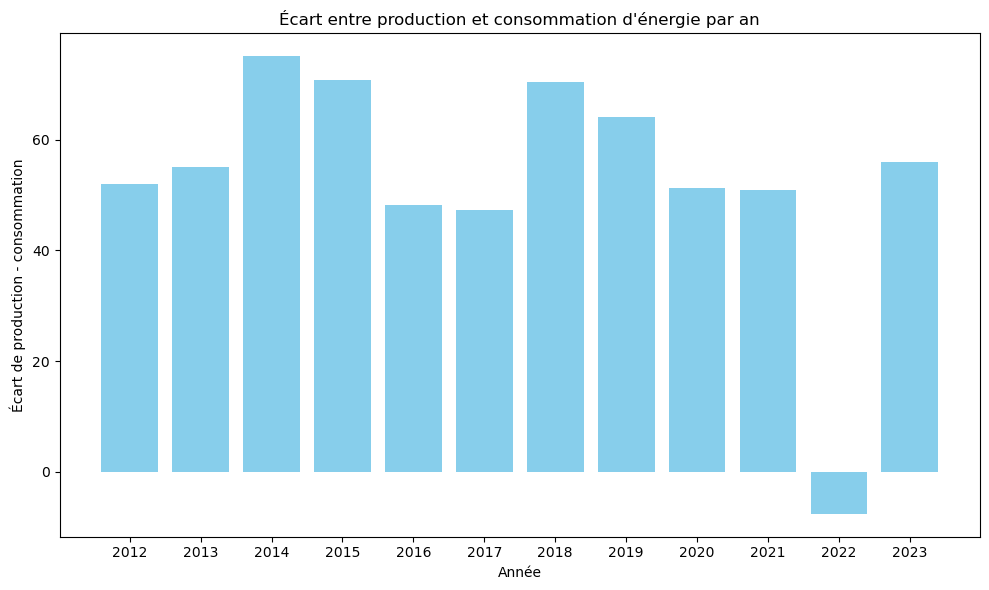

In [118]:
#le graphique de la comparaison entre la consommation et la production :
plt.figure(figsize=(10, 6))
plt.bar(data_prod['annee'], data_prod['ecart_production_consommation'], color='skyblue')
plt.title("Écart entre production et consommation d'énergie par an")
plt.xlabel("Année")
plt.ylabel("Écart de production - consommation")
plt.xticks(data_prod['annee'])  # Assurer que toutes les années sont affichées sur l'axe x
plt.tight_layout()
plt.show()


#### Interprétation des résultats :

En 2016, la production totale d'énergie était supérieure à la consommation totale d'environ 48.20 unités (l'unité dépend de la mesure dans votre jeu de données).
En 2019, cet écart était d'environ 64.07 unités, indiquant une production excédentaire par rapport à la consommation.
En 2020, l'écart était d'environ 51.25 unités, encore une fois montrant une production excédentaire.
En 2013, l'écart était de 55 unités, indiquant également une production excédentaire.
En 2017, l'écart était d'environ 47.22 unités, indiquant une production excédentaire.
En 2023, l'écart était d'environ 56 unités, indiquant une production excédentaire.
En 2012, l'écart était de 52 unités, indiquant une production excédentaire.
En 2014, l'écart était d'environ 75.06 unités, indiquant une production excédentaire importante.
En 2015, l'écart était d'environ 70.71 unités, montrant également une production excédentaire importante.
En 2018, l'écart était d'environ 70.36 unités, indiquant une production excédentaire importante.
En 2021, l'écart était d'environ 50.91 unités, montrant une production excédentaire.
En 2022, l'écart était d'environ -7.59 unités. Dans ce cas, la consommation totale était légèrement supérieure à la production totale, ce qui indique un déficit.

<Figure size 1000x600 with 0 Axes>

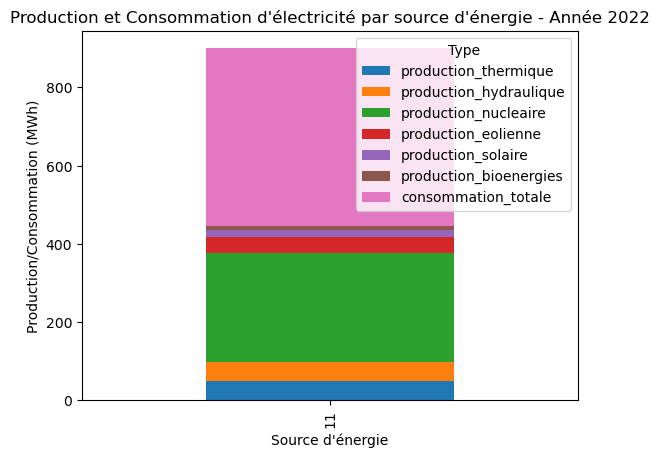

In [49]:
for annee in [2022]:  # Ne parcourir que l'année 2022
    data_annee = data_prod[data_prod['annee'] == annee]
    data_annee_energie = data_annee[['production_thermique', 'production_hydraulique', 'production_nucleaire', 'production_eolienne', 'production_solaire', 'production_bioenergies', 'consommation_totale']]
    plt.figure(figsize=(10, 6))  # Ajuster la taille de la figure selon vos besoins
    data_annee_energie.plot(kind='bar', stacked=True)
    plt.xlabel('Source d\'énergie')
    plt.ylabel('Production/Consommation (MWh)')
    plt.title(f'Production et Consommation d\'électricité par source d\'énergie - Année {annee}')
    plt.legend(title='Type')

    plt.show()


### Production d'électricité

La production d'électricité est répartie en cinq zones, chacune représentant une source d'énergie différente :

Production thermique: Cette zone représente la production d'électricité à partir de combustibles fossiles, tels que le charbon, le gaz naturel et le fioul. En 2022, la production thermique a été la source d'énergie la plus importante en France, représentant 800 GWh.
Production hydraulique: Cette zone représente la production d'électricité à partir de l'eau, comme dans les centrales hydroélectriques. En 2022, la production hydraulique a été la deuxième source d'énergie la plus importante en France, représentant 600 GWh.
Production nucléaire: Cette zone représente la production d'électricité à partir de la fission nucléaire. En 2022, la production nucléaire a été la troisième source d'énergie la plus importante en France, représentant 400 GWh.
Production éolienne: Cette zone représente la production d'électricité à partir du vent, comme dans les éoliennes. En 2022, la production éolienne a été la quatrième source d'énergie la plus importante en France, représentant 200 GWh.
Production solaire: Cette zone représente la production d'électricité à partir du soleil, comme dans les panneaux photovoltaïques. En 2022, la production solaire a été la cinquième source d'énergie la plus importante en France, représentant 100 GWh.

#### Analyse des tendances :

Observer l'évolution de la production pour chaque source d'énergie sur la période analysée.
Identifier les sources d'énergie dont la production a le plus augmenté ou diminué.
Calculer les taux de croissance ou de décroissance pour chaque source.
Mettre en évidence les changements de mix énergétique, c'est-à-dire la part relative de chaque source dans la production totale.

In [50]:
data_prod_energie = data_prod[['production_thermique', 'production_hydraulique', 'production_nucleaire', 'production_eolienne', 'production_solaire', 'production_bioenergies']]
data_prod_energie


,production_thermique,production_hydraulique,production_nucleaire,production_eolienne,production_solaire,production_bioenergies
0,45.0,63.6,384.0,20.9,8.4,8.6
1,41.7,59.6,379.5,33.8,12.0,9.5
2,37.4,65.0,335.4,39.7,12.7,9.6
3,43.6,75.5,404.0,15.9,4.7,7.1
4,53.5,53.2,379.1,24.0,9.1,9.3
5,32.6,58.8,320.4,50.8,21.6,10.4
6,48.1,63.8,405.0,14.9,4.1,5.8
7,24.6,67.4,415.8,17.0,5.9,7.1
8,33.0,58.7,416.8,21.1,7.4,7.7
9,38.4,67.8,393.2,28.1,10.4,9.5


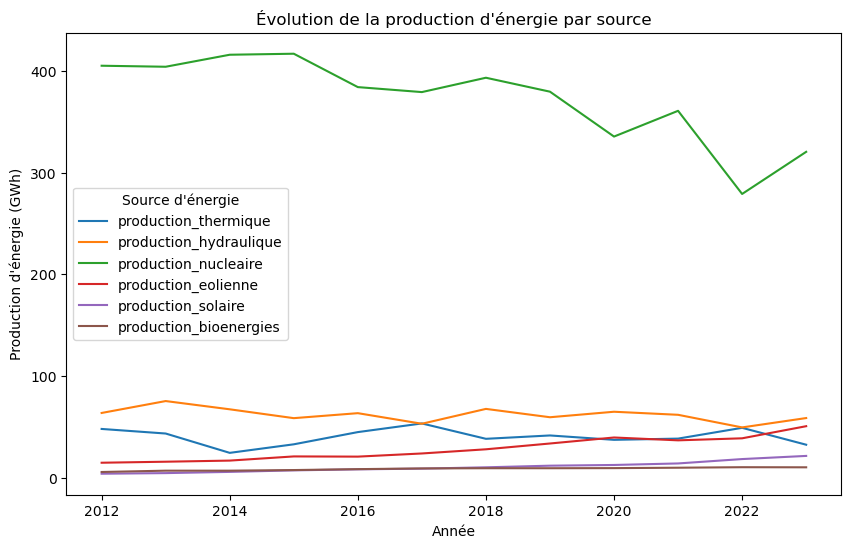

In [51]:
# Sélection des colonnes de production d'énergie et des années d'analyse
data_prod_energie = data_prod[['production_thermique', 'production_hydraulique', 'production_nucleaire', 'production_eolienne', 'production_solaire', 'production_bioenergies']]
annees_specifiques = data_prod['annee']  # Exemple d'années

# Regroupement des données par année et calcul des totaux
data_prod_par_annee = data_prod_energie.groupby(annees_specifiques).sum()

# Création du graphique en courbes
data_prod_par_annee.plot(kind="line", figsize=(10, 6))
plt.xlabel("Année")
plt.ylabel("Production d'énergie (GWh)")
plt.title("Évolution de la production d'énergie par source")
plt.legend(title="Source d'énergie")


# Affichage du graphique
plt.show()


#### Interprétation courte et simple du graphique : Evolution de la production d'énergie par source

##### Le graphique montre l'évolution de la production d'énergie en France par source entre 2012 et 2022.

-Production thermique en baisse : La production d'énergie thermique a diminué de manière constante au cours de la période étudiée. Cela est dû à la transition vers des sources d'énergie plus propres et à l'augmentation de l'efficacité énergétique.

-Production hydraulique stable : La production d'énergie hydraulique est restée relativement stable au cours de la période étudiée. Cette source d'énergie est déjà bien exploitée en France et son potentiel de développement est limité.

-Production nucléaire en baisse : La production d'énergie nucléaire a également diminué au cours de la période étudiée. Cette baisse est due à plusieurs facteurs, tels que la fermeture de centrales nucléaires vieillissantes et les inquiétudes croissantes concernant la sécurité nucléaire.

-Forte croissance des énergies renouvelables : La production d'énergie éolienne et solaire a connu une croissance exponentielle au cours de la période étudiée. Ces sources d'énergie sont de plus en plus compétitives et contribuent à la décarbonation du mix énergétique français.

-Production bioénergies en augmentation : La production d'énergie bioénergies a également connu une croissance régulière au cours de la période étudiée. Cette source d'énergie joue un rôle important dans la transition énergétique, car elle est renouvelable et locale.

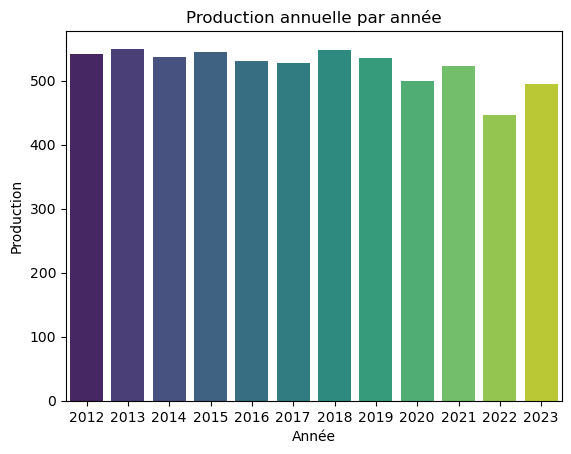

In [52]:
# Diagramme à barres de la production annuelle par année :
# Cela peut montrer la production annuelle pour chaque année individuelle.
#plt.figure(figsize=(20, 16))  # Définit la taille de la figure
sns.barplot(x='annee', y='production_totale', data=data_prod, palette='viridis')  # Trace le diagramme à barres
plt.title('Production annuelle par année')  # le titre du diagramme
plt.xlabel('Année')  # Définit le titre de l'axe des x
plt.ylabel('Production')  # Définit le titre de l'axe des y
plt.show()  # Affiche le diagramme


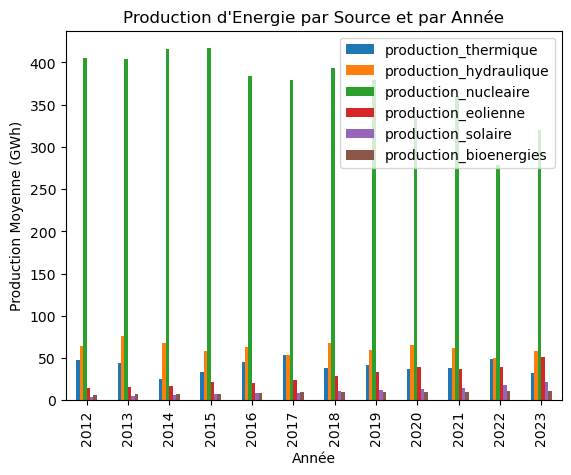

In [53]:
# Regroupement les données par année
data_prod_par_annee = data_prod_energie.groupby(data_prod['annee']) 
# Calcul la moyenne de la production par année
data_prod_par_annee_moyenne = data_prod_par_annee.mean()
# Création le graphique à barres
data_prod_par_annee_moyenne.plot(kind='bar')
plt.xlabel('Année')
plt.ylabel('Production Moyenne (GWh)')
plt.title('Production d\'Energie par Source et par Année')

plt.show()


#### Etude de la production d'énergie pour une année prise au hasard :

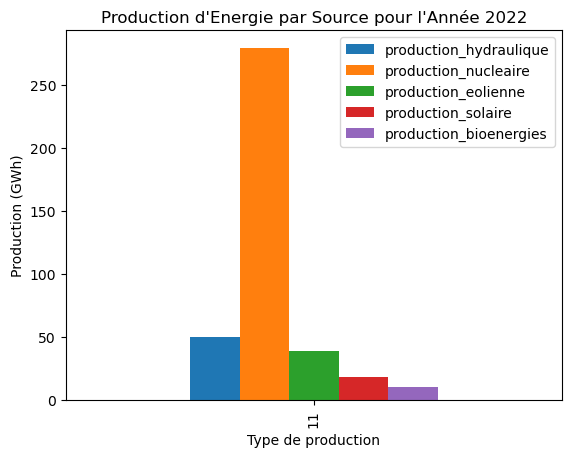

In [54]:
# Sélection l'année à visualiser
annee_specifique = 2022  

# Filtrage les données par année
data_prod_annee = data_prod[data_prod['annee'] == annee_specifique]

# Sélection les colonnes de production d'énergie renouvelable
data_prod_energie = data_prod_annee[['production_hydraulique', 'production_nucleaire', 'production_eolienne', 'production_solaire', 'production_bioenergies']]

# Création le graphique à barres
data_prod_energie.plot(kind='bar')
plt.xlabel('Type de production')
plt.ylabel('Production (GWh)')
plt.title(f'Production d\'Energie par Source pour l\'Année {annee_specifique}')
plt.show()


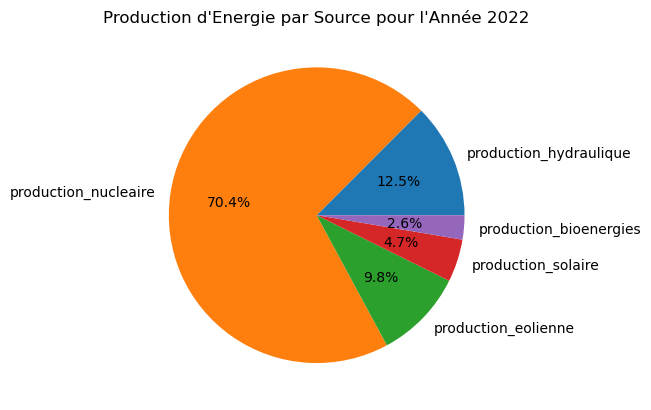

In [55]:
annee_specifique = 2022

data_prod_annee = data_prod[data_prod['annee'] == annee_specifique]

data_prod_energie = data_prod_annee[['production_hydraulique', 'production_nucleaire', 'production_eolienne', 'production_solaire', 'production_bioenergies']]


data_prod_energie_total = data_prod_energie.sum(axis=0)


data_prod_energie_total.plot(kind='pie', autopct='%1.1f%%')
plt.title(f'Production d\'Energie par Source pour l\'Année {annee_specifique}')
plt.show()


## Etude de la consommation :

In [56]:
# Chargement des données de consommation1 :

# Chargement des données de consommation2 :
data_conso = pd.read_csv("conso_annuelle.csv", sep=";")

In [57]:
data_elec.head(5)

,operateur,filiere,annee,code_departement,nom_departement,code_region,nom_region,code_categorie_consommation,code_grand_secteur,code_secteur_naf2,...,superficie_des_logements_80_a_100_m2,superficie_des_logements_100_m2,residences_principales_avant_1919,residences_principales_de_1919_a_1945,residences_principales_de_1946_a_1970,residences_principales_de_1971_a_1990,residences_principales_de_1991_a_2005,residences_principales_de_2006_a_2015,residences_principales_apres_2016,taux_de_chauffage_electrique
0,RTE,E,2019,37.0,Indre-et-Loire,24.0,Centre-Val de Loire,ENT,INDUSTRIE,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,RTE,E,2019,37.0,Indre-et-Loire,24.0,Centre-Val de Loire,ENT,TERTIAIRE,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,RTE,E,2019,38.0,Isère,84.0,Auvergne-Rhône-Alpes,ENT,INDUSTRIE,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,RTE,E,2019,38.0,Isère,84.0,Auvergne-Rhône-Alpes,ENT,INDUSTRIE,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,RTE,E,2019,40.0,Landes,75.0,Nouvelle-Aquitaine,ENT,INDUSTRIE,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
data_conso.head(5)

,Appareil suivi,ID logement,Consommation annuelle AN1,Consommation annuelle AN2,Type
0,Audio_TV,106,"1,7",NaN,Barre De Son
1,Audio_TV,302,"22,2","16,7",Barre De Son
2,Audio_TV,311,"14,7",13,Barre De Son
3,Audio_TV,410,"7,8","7,8",Barre De Son
4,Audio_TV,608,"7,9","7,5",Barre De Son


In [59]:
data_conso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Appareil suivi              2263 non-null   object
 1   ID logement                 2263 non-null   int64 
 2   Consommation annuelle  AN1  1874 non-null   object
 3   Consommation annuelle AN2   1850 non-null   object
 4   Type                        861 non-null    object
dtypes: int64(1), object(4)
memory usage: 88.5+ KB


In [60]:
data_elec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48042 entries, 0 to 83627
Data columns (total 42 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   operateur                                                                 48042 non-null  object 
 1   filiere                                                                   48042 non-null  object 
 2   annee                                                                     48042 non-null  int64  
 3   code_departement                                                          48042 non-null  object 
 4   nom_departement                                                           48042 non-null  object 
 5   code_region                                                               48042 non-null  float64
 6   nom_region                                                         

In [61]:
data_conso.describe() # tous columns

,ID logement
count,2263.000000
mean,570.577552
std,291.423066
min,101.000000
25%,308.000000
50%,603.000000
75%,809.000000
max,1011.000000


In [62]:
data_elec.describe()

,annee,code_region,code_secteur_naf2,nb_sites,conso_totale_mwh,conso_moyenne_mwh,nombre_de_mailles_secretisees,part_thermosensible,conso_totale_a_usages_thermosensibles_mwh,conso_totale_a_usages_non_thermosensibles_mwh,...,superficie_des_logements_80_a_100_m2,superficie_des_logements_100_m2,residences_principales_avant_1919,residences_principales_de_1919_a_1945,residences_principales_de_1946_a_1970,residences_principales_de_1971_a_1990,residences_principales_de_1991_a_2005,residences_principales_de_2006_a_2015,residences_principales_apres_2016,taux_de_chauffage_electrique
count,48042.000000,48042.000000,48042.000000,4.804200e+04,4.804200e+04,48042.000000,48042.000000,48042.000000,4.804200e+04,4.804200e+04,...,48042.000000,48042.000000,48042.000000,48042.000000,48042.000000,48042.000000,48042.000000,48042.000000,48042.000000,48042.000000
mean,2020.124016,52.617252,43.994338,4.251772e+03,4.465734e+04,2615.764990,4.662649,0.215207,3.533207e+03,1.198433e+04,...,364.082779,501.498486,187.981378,144.323174,338.432871,448.449688,250.734087,185.309708,33.742553,0.863605
std,1.403006,27.462676,30.435946,4.385120e+04,2.195377e+05,19923.223602,28.366366,2.260341,4.467253e+04,1.465691e+05,...,6222.523019,8336.896063,3659.322462,3281.786290,6162.961451,7687.612822,4299.762837,3243.470722,611.219099,10.619940
min,2018.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,28.000000,18.000000,3.000000e+00,6.462310e+02,73.462897,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.000000,52.000000,42.000000,1.400000e+01,4.496158e+03,163.613944,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2021.000000,76.000000,70.000000,7.000000e+01,2.289031e+04,416.424923,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2022.000000,94.000000,99.000000,1.367887e+06,6.456722e+06,949760.608000,607.000000,39.880000,1.592366e+06,4.301554e+06,...,299551.046372,313019.691041,365121.789454,217052.819198,265420.921143,283522.527351,151298.995949,123830.587241,24746.098106,337.945249


In [63]:
data_elec.columns.tolist()

['operateur',
 'filiere',
 'annee',
 'code_departement',
 'nom_departement',
 'code_region',
 'nom_region',
 'code_categorie_consommation',
 'code_grand_secteur',
 'code_secteur_naf2',
 'nb_sites',
 'conso_totale_mwh',
 'conso_moyenne_mwh',
 'nombre_de_mailles_secretisees',
 'part_thermosensible',
 'conso_totale_a_usages_thermosensibles_mwh',
 'conso_totale_a_usages_non_thermosensibles_mwh',
 'thermosensibilite_totale_kwh_dju',
 'conso_totale_corrigee_de_l_alea_climatique_a_usages_thermosensibles_mwh',
 'conso_moyenne_a_usages_thermosensibles_mwh',
 'conso_moyenne_a_usages_non_thermosensibles_mwh',
 'thermosensibilite_moyenne_kwh_dju',
 'conso_moyenne_corrigee_de_l_alea_climatique_a_usages_thermosensibles_mwh',
 'dju_a_tr',
 'dju_a_tn',
 'nombre_d_habitants',
 'taux_de_logements_collectifs',
 'taux_de_residences_principales',
 'superficie_des_logements_30_m2',
 'superficie_des_logements_30_a_40_m2',
 'superficie_des_logements_40_a_60_m2',
 'superficie_des_logements_60_a_80_m2',
 'super

In [64]:
data_conso.columns.tolist()

['Appareil suivi',
 'ID logement',
 'Consommation annuelle  AN1',
 'Consommation annuelle AN2',
 'Type']

 ### Consommation de gaz et électricité:


In [65]:
data_elec.head(5)

,operateur,filiere,annee,code_departement,nom_departement,code_region,nom_region,code_categorie_consommation,code_grand_secteur,code_secteur_naf2,...,superficie_des_logements_80_a_100_m2,superficie_des_logements_100_m2,residences_principales_avant_1919,residences_principales_de_1919_a_1945,residences_principales_de_1946_a_1970,residences_principales_de_1971_a_1990,residences_principales_de_1991_a_2005,residences_principales_de_2006_a_2015,residences_principales_apres_2016,taux_de_chauffage_electrique
0,RTE,E,2019,37.0,Indre-et-Loire,24.0,Centre-Val de Loire,ENT,INDUSTRIE,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,RTE,E,2019,37.0,Indre-et-Loire,24.0,Centre-Val de Loire,ENT,TERTIAIRE,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,RTE,E,2019,38.0,Isère,84.0,Auvergne-Rhône-Alpes,ENT,INDUSTRIE,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,RTE,E,2019,38.0,Isère,84.0,Auvergne-Rhône-Alpes,ENT,INDUSTRIE,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,RTE,E,2019,40.0,Landes,75.0,Nouvelle-Aquitaine,ENT,INDUSTRIE,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Visualisation simple de l'évolution générale de la consommation de l'électricité :

C:\Users\soule\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\soule\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


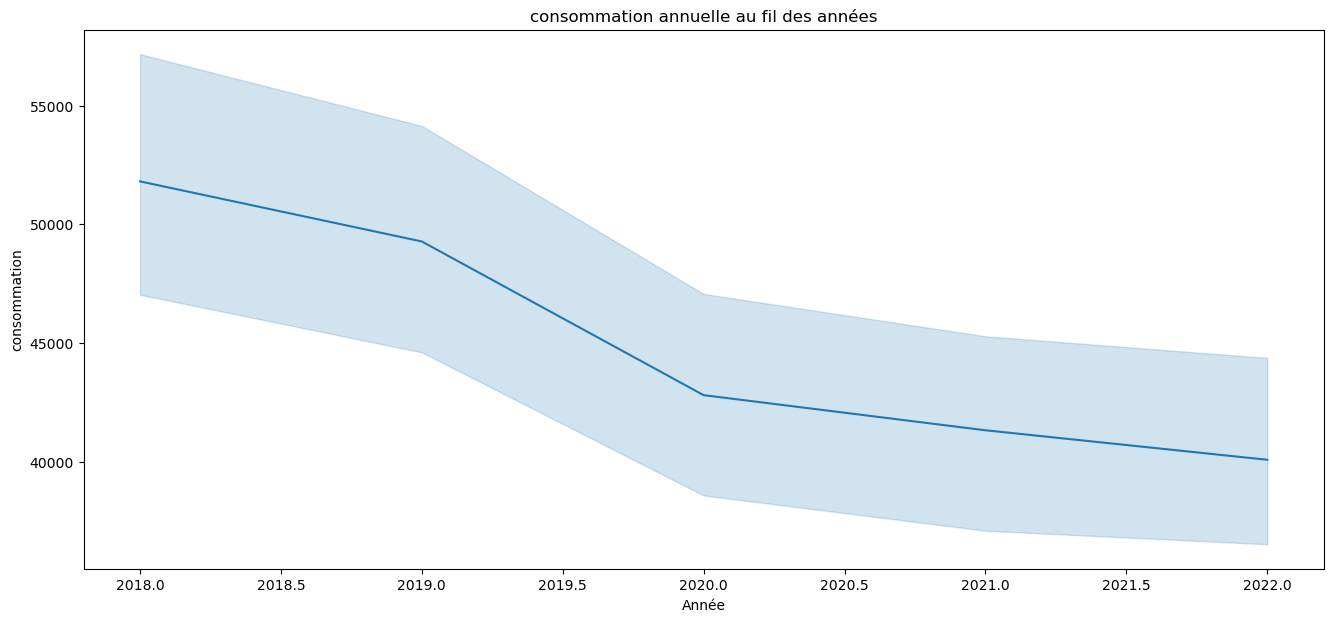

In [66]:
# Visualisation simple de l'évolution de la consommation de l'électricité :
plt.figure(figsize=(16, 7))
sns.lineplot(x='annee', y='conso_totale_mwh', data=data_elec)
plt.title('consommation annuelle au fil des années')
plt.xlabel('Année')
plt.ylabel('consommation')
plt.show()

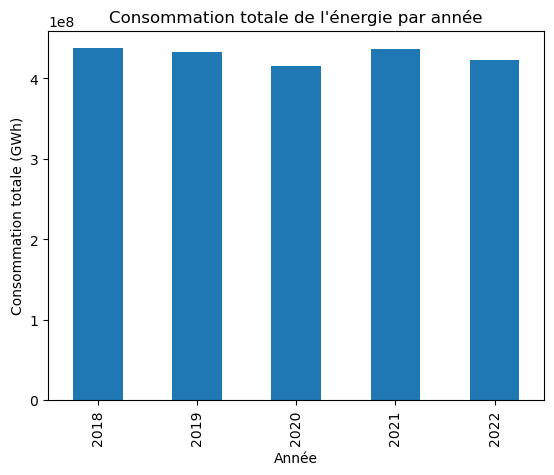

In [67]:
# Graphique à barres pour la consommation totale  par année
data_elec.groupby('annee')['conso_totale_mwh'].sum().plot(kind='bar')
plt.title("Consommation totale de l'énergie par année")
plt.xlabel('Année')
plt.ylabel('Consommation totale (GWh)')
#plt.ylim(0, 600)  # Définir les limites de l'axe y
plt.show()


In [121]:
# les noms de Départements :
conso_dep=data_elec['nom_departement']
for departement in conso_dep:
    departement

In [122]:
# Affichage des 5 premiers départements

noms_departements = data_elec['nom_departement'].tolist()[:5]

for departement in noms_departements:
  print(departement)


Indre-et-Loire
Indre-et-Loire
Isère
Isère
Landes


In [69]:
# un nouveau DataFrame contenant la somme de la consommation totale par département
consommation_departement = data_elec.groupby('nom_departement')['conso_totale_mwh'].sum().reset_index()
consommation_departement

,nom_departement,conso_totale_mwh
0,0,1.038939e+07
1,Ain,2.996136e+07
2,Aisne,1.613572e+07
3,Allier,1.076367e+07
4,Alpes-Maritimes,3.386534e+07
...,...,...
97,Vendée,2.400366e+07
98,Vienne,1.264664e+07
99,Vosges,1.728434e+07
100,Yonne,1.229326e+07


In [70]:
print(consommation_departement['nom_departement'])

0                    0
1                  Ain
2                Aisne
3               Allier
4      Alpes-Maritimes
            ...       
97              Vendée
98              Vienne
99              Vosges
100              Yonne
101           Yvelines
Name: nom_departement, Length: 102, dtype: object


### La consommation de chaque départements par ordre croisant :

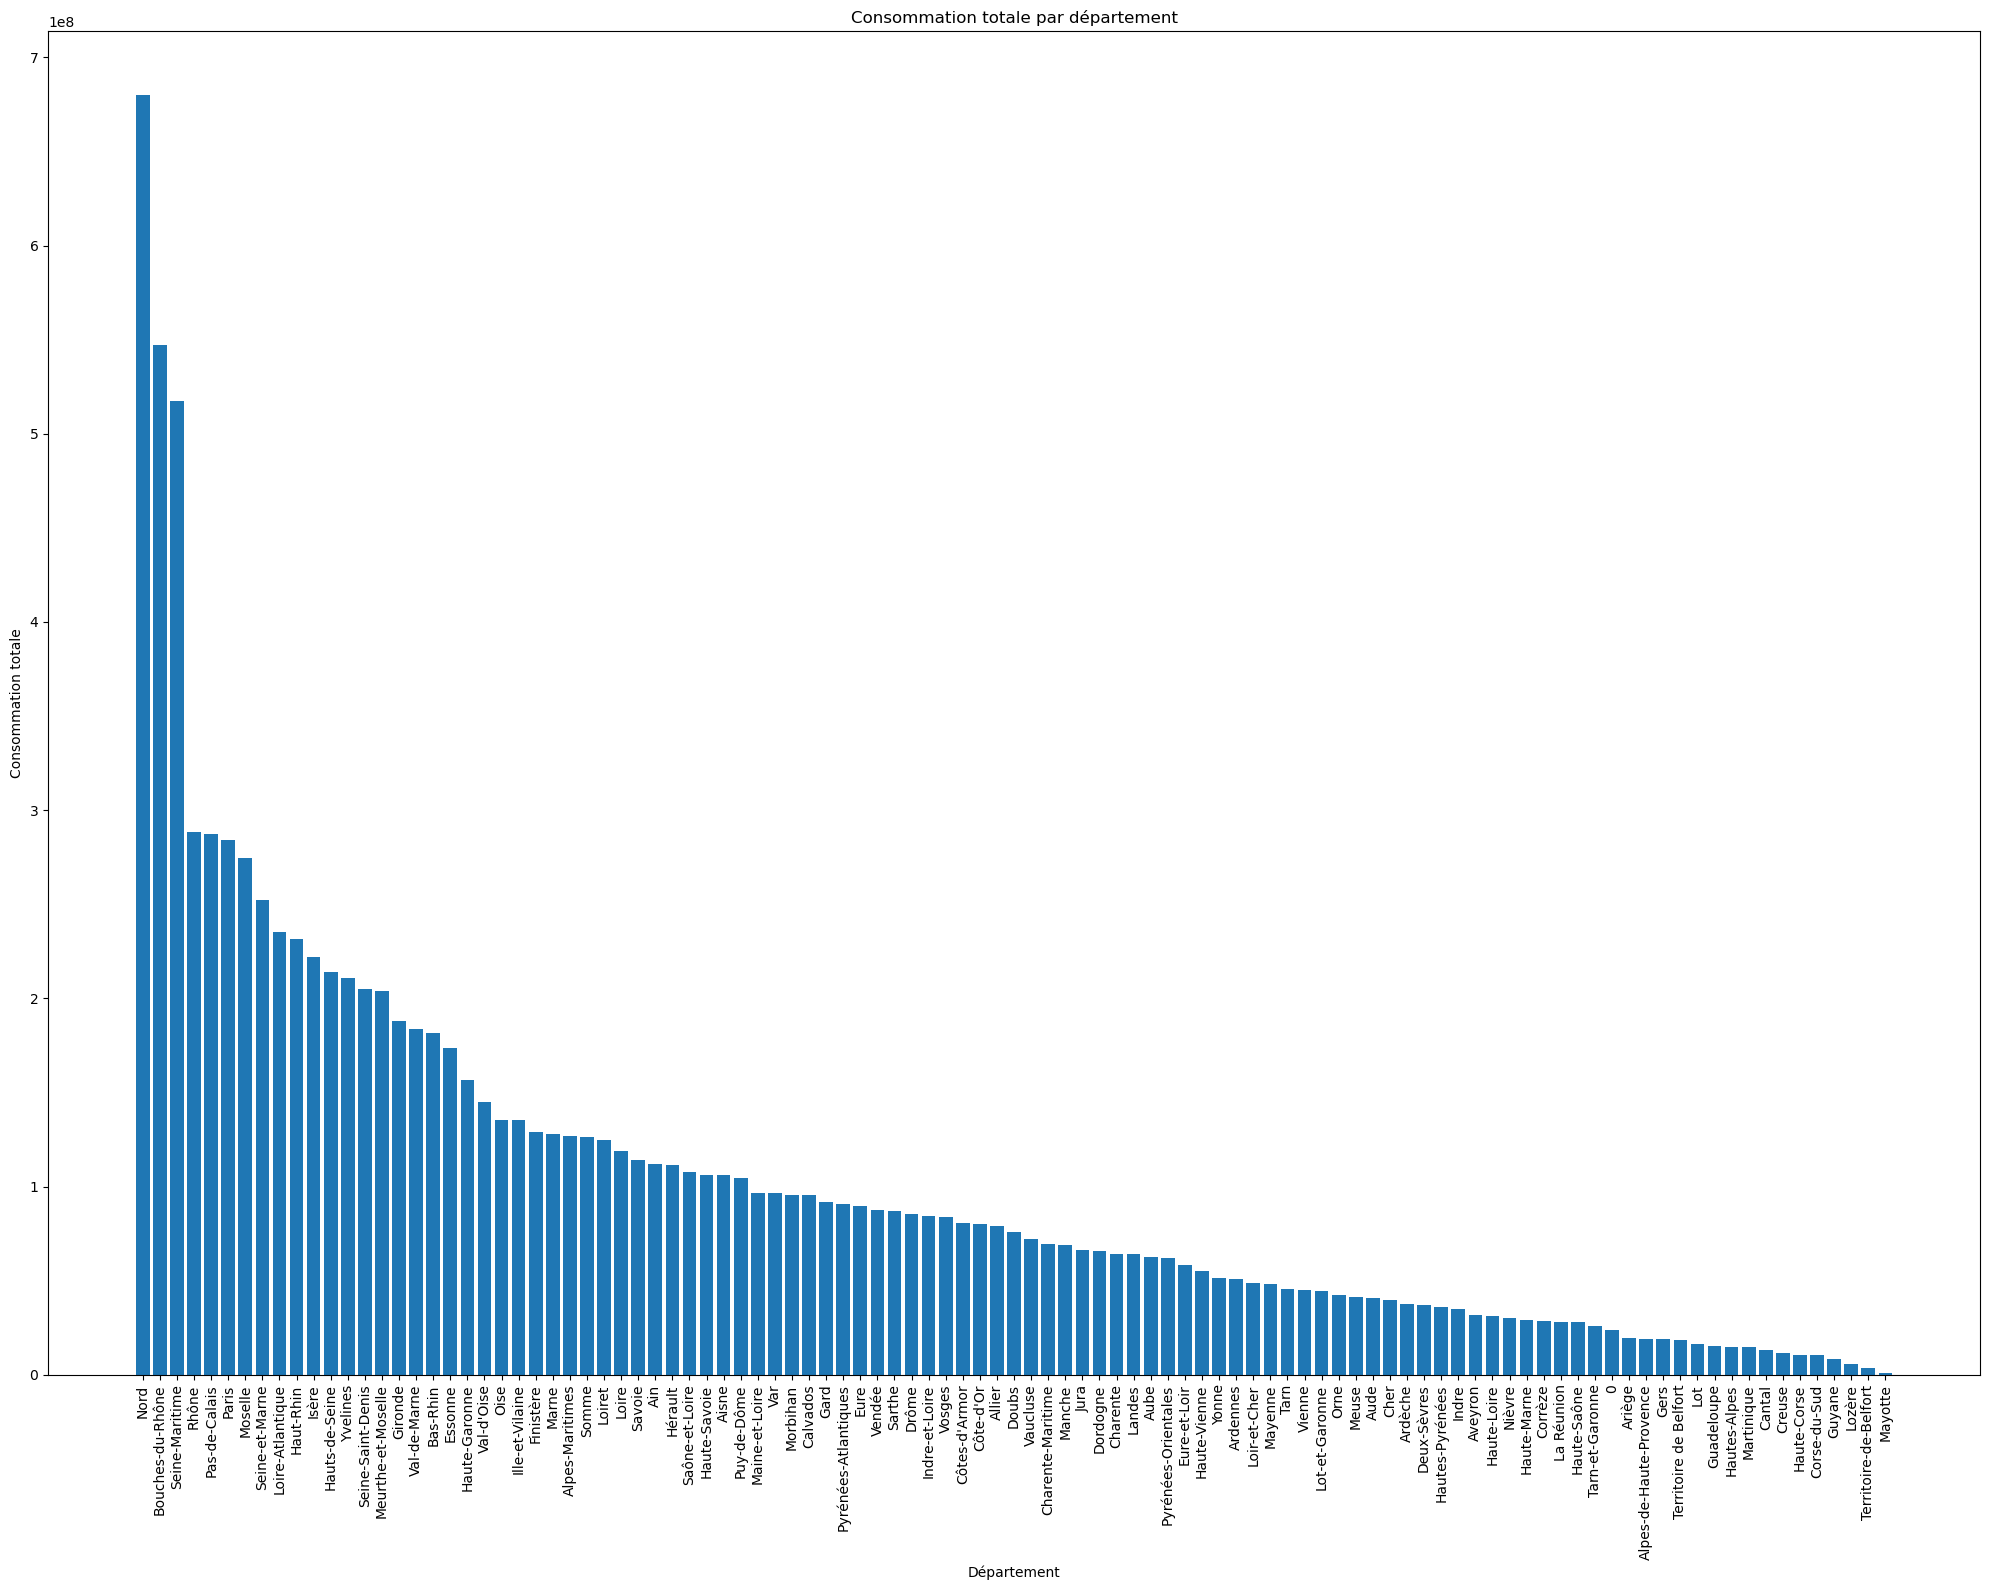

In [71]:
# Calcul de la consommation totale par département 
consommation_departement = data_gaz_elec.groupby('nom_departement')['conso_totale_mwh'].sum().reset_index()

consommation_departement['nom_departement'] = consommation_departement['nom_departement'].astype(str)

# Trie les départements par ordre décroissant de consommation
consommation_departement = consommation_departement.sort_values(by='conso_totale_mwh', ascending=False)

# diagramme à barres pour visualiser la consommation par département
plt.figure(figsize=(20, 16))  # Crée une nouvelle figure avec une taille spécifiée
plt.bar(consommation_departement['nom_departement'], consommation_departement['conso_totale_mwh'])  # Trace un diagramme à barres
plt.xlabel('Département')  # le label de l'axe des x
plt.ylabel('Consommation totale')  #  le label de l'axe des y
plt.title('Consommation totale par département')  # le titre du graphique
plt.xticks(rotation=90)  # pivotage les étiquettes de l'axe des x de 90 degrés pour une meilleure lisibilité
plt.tight_layout()  # la disposition pour éviter les chevauchements
plt.show()  # Affichage le graphique


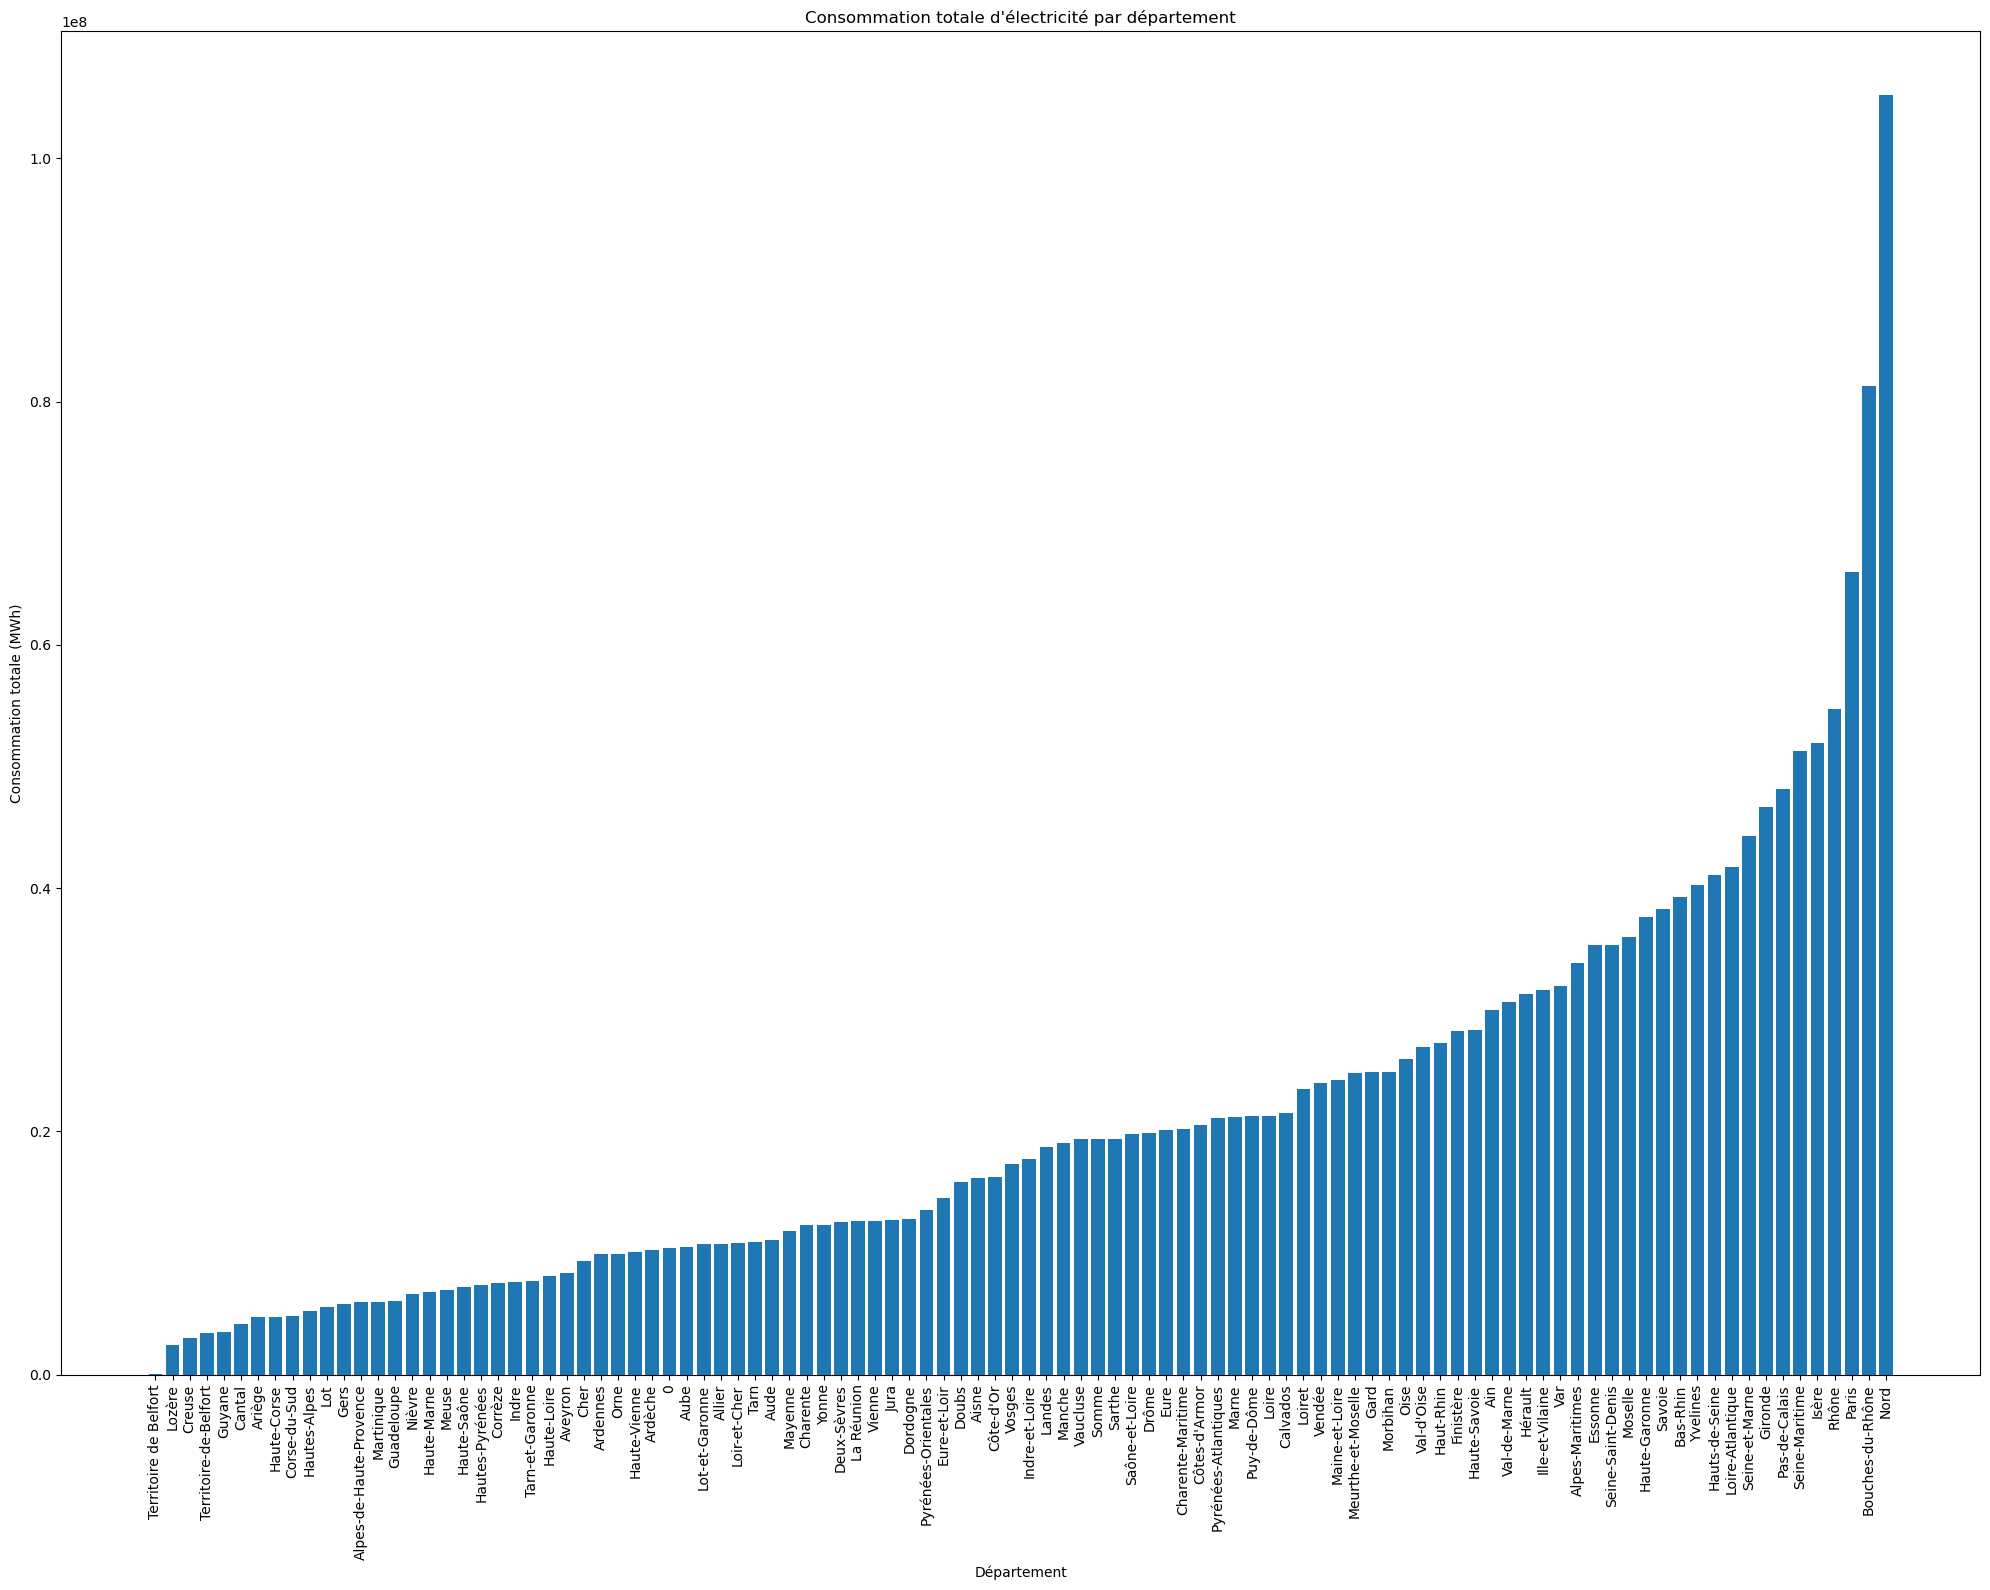

In [72]:
# Sélection de la filière électricité (en enlevant le gaz)
data_elec = data_gaz_elec[data_gaz_elec["filiere"] == "E"]

# Calcul de la consommation totale par département
consommation_departement = data_elec.groupby('nom_departement')['conso_totale_mwh'].sum().reset_index()

# Conversion des valeurs de 'nom_departement' en chaînes de caractères
consommation_departement['nom_departement'] = consommation_departement['nom_departement'].astype(str)

# Trier les départements par ordre croissant de consommation totale
consommation_departement = consommation_departement.sort_values(by='conso_totale_mwh')

# Visualisation de la consommation par département
plt.figure(figsize=(20, 16))

# Création du diagramme à barres
plt.bar(consommation_departement['nom_departement'], consommation_departement['conso_totale_mwh'])

# Personnalisation des étiquettes et du titre
plt.xlabel('Département')
plt.ylabel('Consommation totale (MWh)')
plt.title('Consommation totale d\'électricité par département')

# Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.xticks(rotation=90)

# Ajustement de la disposition pour éviter les chevauchements
plt.tight_layout()

# Affichage du graphique
plt.show()


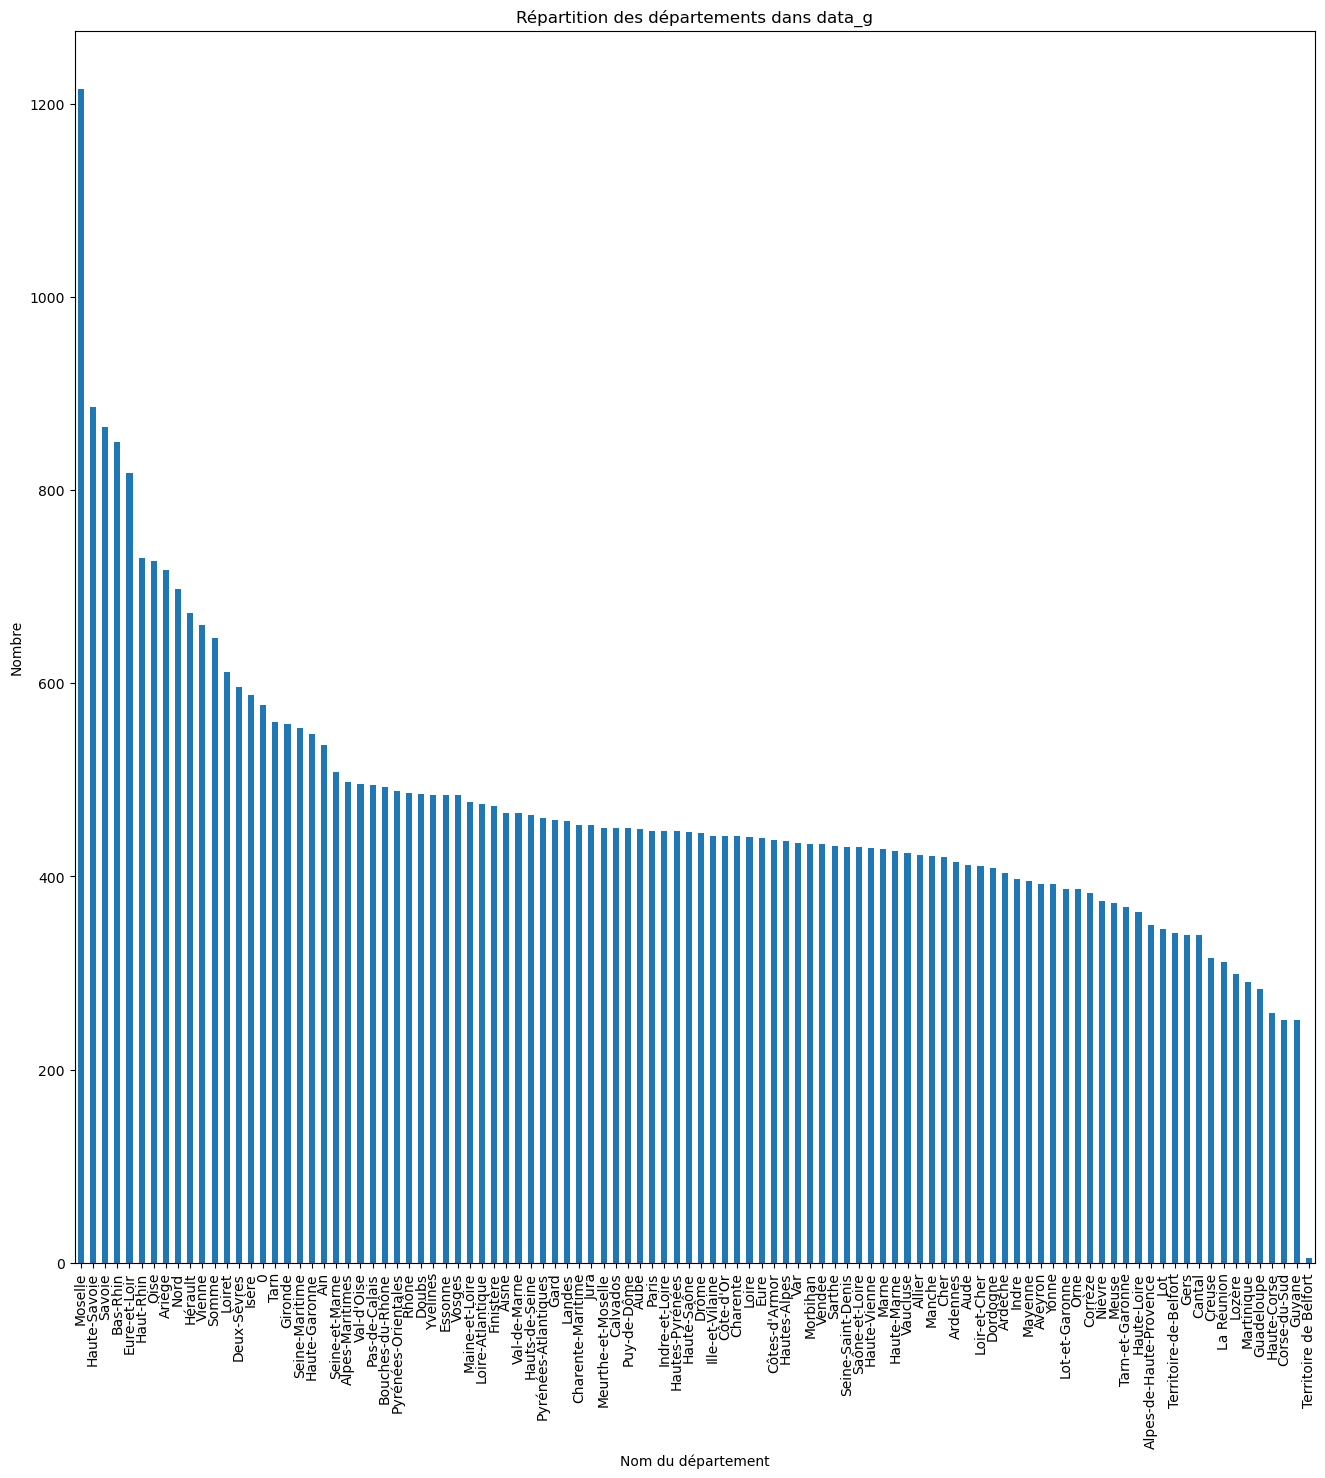

In [73]:
# Compter les occurrences de chaque département par ordre décroissant :
nombre_occurrences_departements = data_elec['nom_departement'].value_counts()

# Visualisation à l'aide d'un diagramme en barres
plt.figure(figsize=(16, 16))
nombre_occurrences_departements.plot(kind='bar')
plt.title('Répartition des départements dans data_g')
plt.xlabel('Nom du département')
plt.ylabel('Nombre')

plt.show()


#### Top 10 des départements qui consomment le plus

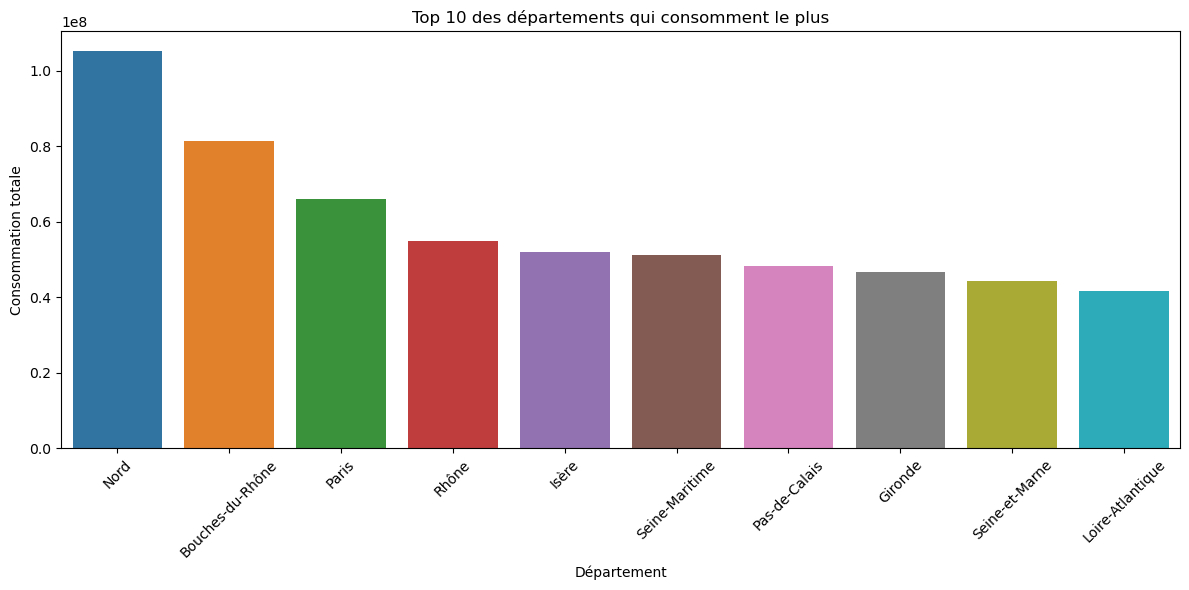

In [74]:
consommation_departement = data_elec.groupby('nom_departement')['conso_totale_mwh'].sum().sort_values(ascending=False)

# les 10 premiers départements
top_10_departements = consommation_departement.head(10)

# diagramme à barres pour visualiser les 10 premiers départements qui consomment le plus :
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_departements.index, y=top_10_departements.values)
plt.xlabel('Département')
plt.ylabel('Consommation totale')
plt.title('Top 10 des départements qui consomment le plus')
plt.xticks(rotation=45)  # Rotation des libellés des départements pour une meilleure lisibilité
plt.tight_layout()  # Ajustement automatique de la disposition
plt.show()


### Régardons un département spécipique pour voir ce qui va donner :

Veuillez entrer le nom_departement :  Nord


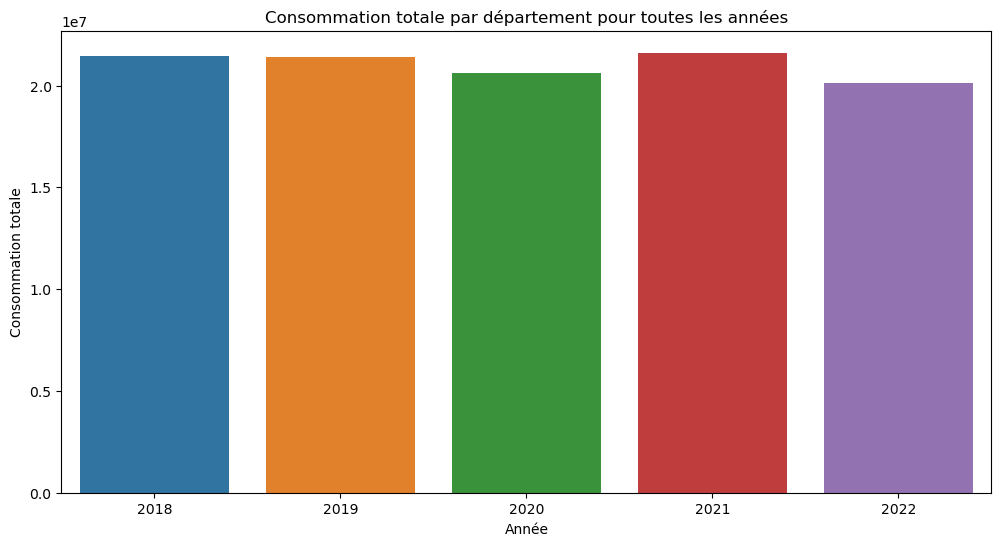

In [75]:
# Demande à l'utilisateur de saisir le libellé du département pour voir la consommation :
libelle_departement = input("Veuillez entrer le nom_departement : ")

# filtrage les données pour le département sélectionné
data_filtered = data_elec[data_elec['nom_departement'] == libelle_departement]

#  les données par département et somme d la consommation totale pour toutes les années :
total_consommation_by_department = data_filtered.groupby('annee')['conso_totale_mwh'].sum().reset_index()

# Visualisation des données pour le département sélectionné
plt.figure(figsize=(12, 6))
sns.barplot(data=total_consommation_by_department, x='annee', y='conso_totale_mwh')
plt.title('Consommation totale par département pour toutes les années')
plt.xlabel('Année')
plt.ylabel('Consommation totale')
plt.show()

#### Pourcentage en consommation de l'énergie des départements :

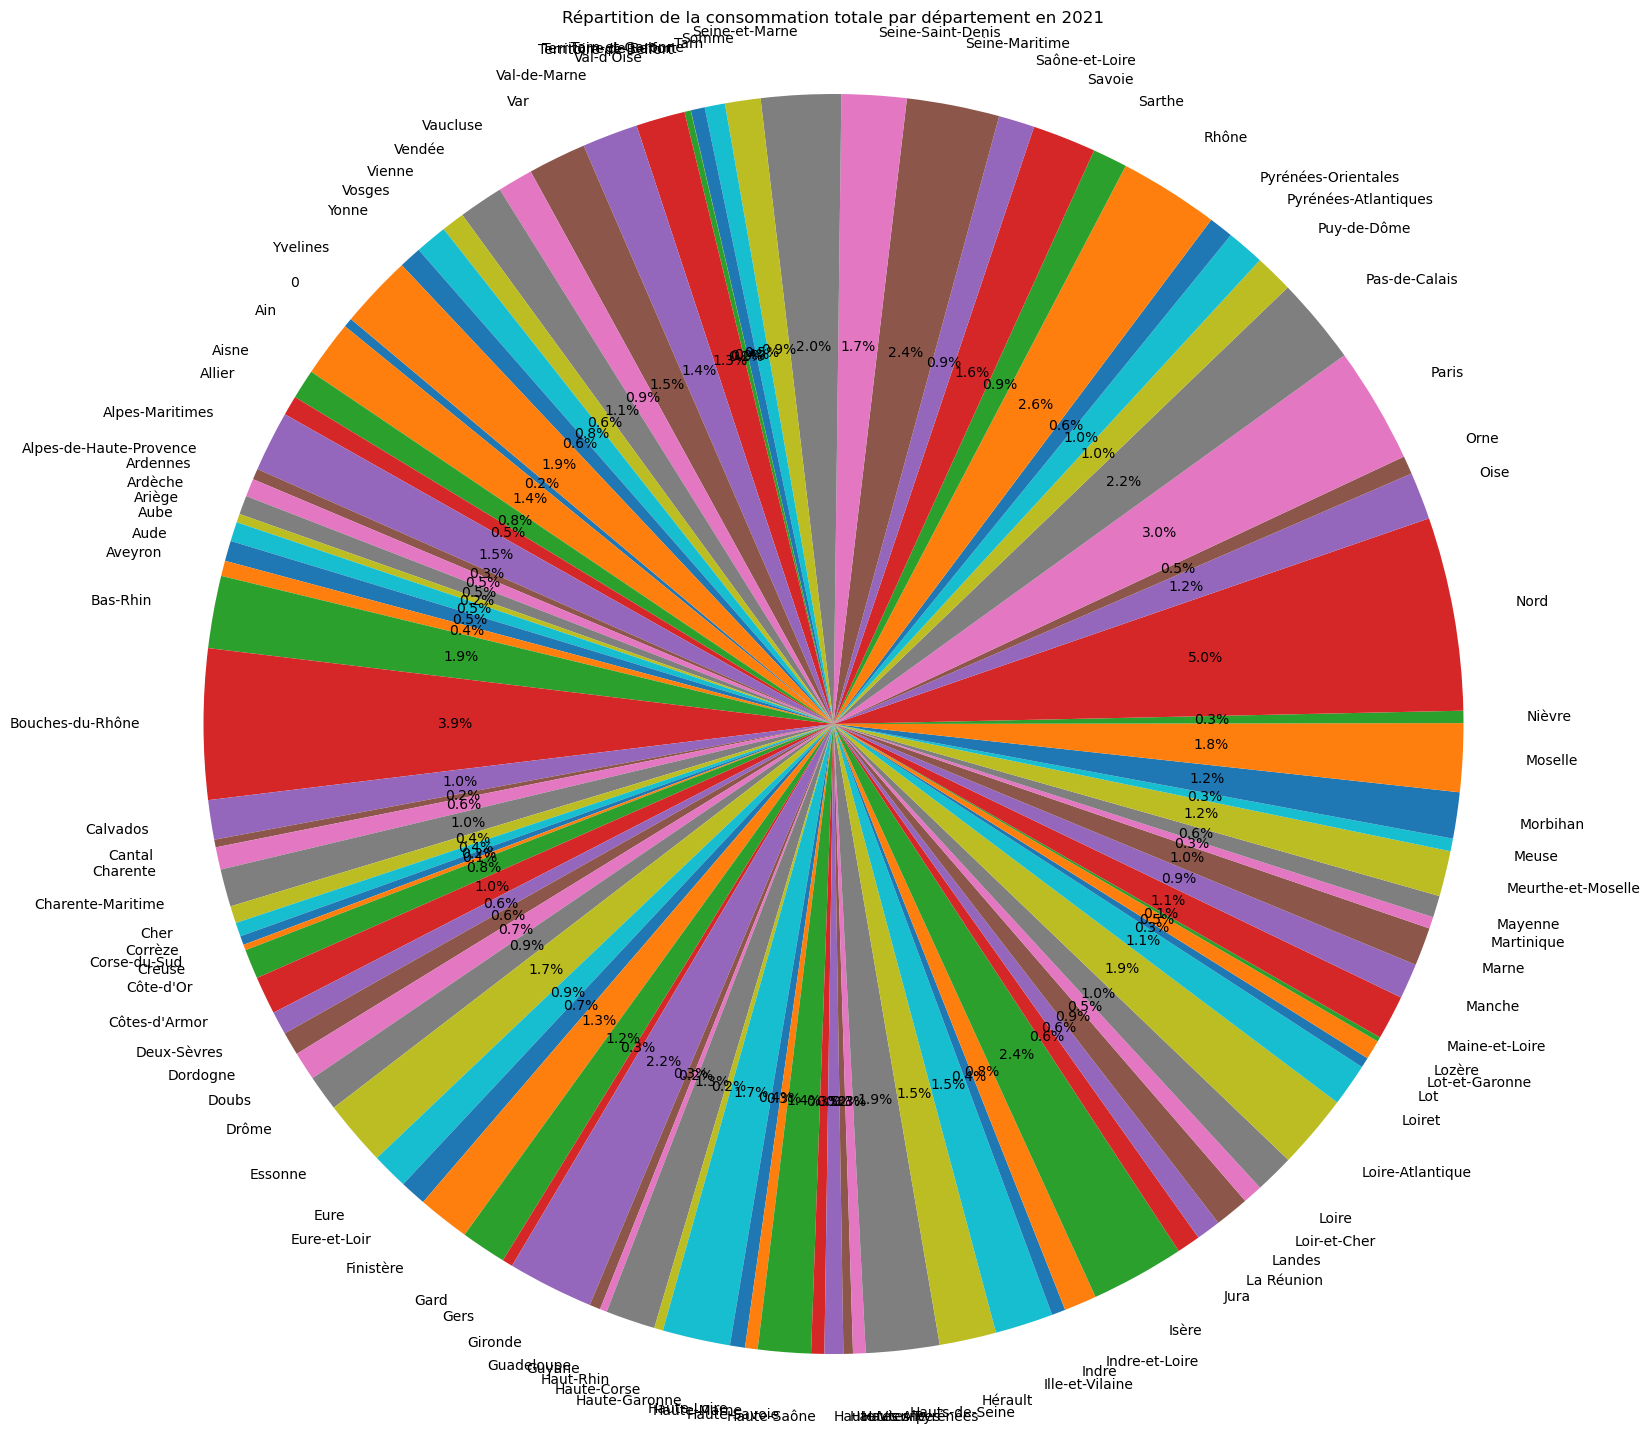

In [76]:
# Sélection d'une année spécifique pour la visualisation de la consommation
annee_selectionnee = 2021
consommation_annee = data_elec[data_elec['annee'] == annee_selectionnee].groupby('nom_departement')['conso_totale_mwh'].sum()

# Tracer un diagramme en secteurs pour visualiser la consommation par département pour une année donnée
plt.figure(figsize=(20, 18))
plt.pie(consommation_annee, labels=consommation_annee.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Répartition de la consommation totale par département en {annee_selectionnee}')
plt.axis('equal')  # Assurer que le diagramme en secteurs est parfaitement circulaire
plt.show()

### 10 top départements qui consomment plus en pourcentage :

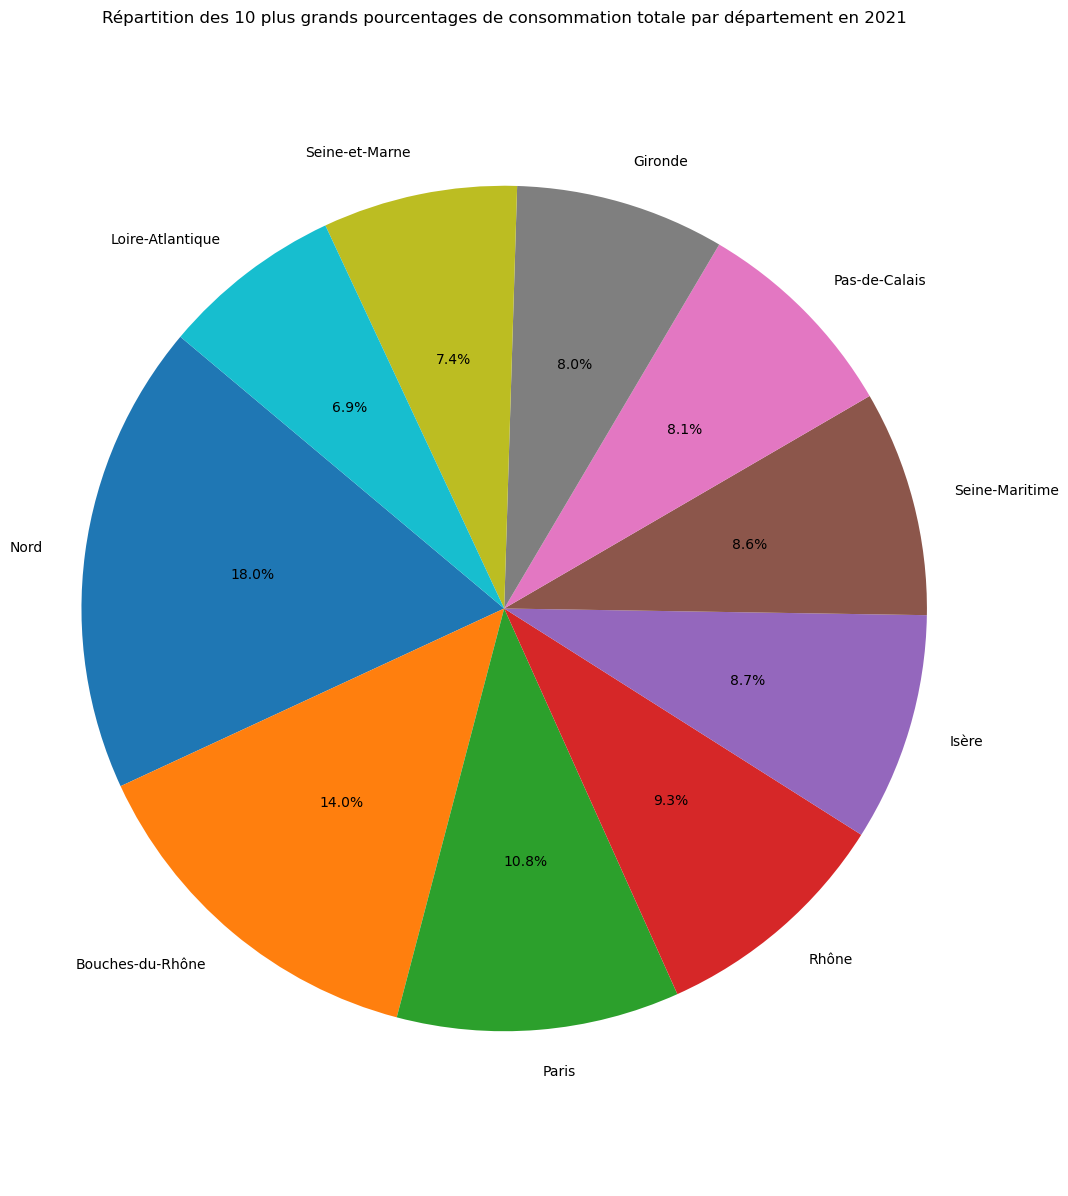

In [77]:
# les données par consommation décroissante
annee_selectionnee = 2021
consommation_annee_triee = consommation_annee.sort_values(ascending=False)

# les 10 plus grands pourcentages
top_10 = consommation_annee_triee.head(10)

# un diagramme en secteurs pour les 10 plus grands pourcentages
plt.figure(figsize=(12, 15))
plt.pie(top_10, labels=top_10.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Répartition des 10 plus grands pourcentages de consommation totale par département en {annee_selectionnee}')
plt.axis('equal')
plt.show()

#### Observations

Le département de Seine-et-Marne est le plus consommateur, avec une consommation totale de 18,0%.
Les 5 départements les plus consommateurs représentent plus de la moitié de la consommation totale (50,8%).
Les 10 départements les plus consommateurs représentent environ 77,7% de la consommation totale.
Conclusion

Le graphique montre que la consommation d'énergie est inégalement répartie en France. Les 10 départements les plus consommateurs représentent une part importante de la consommation totale.

### Détails sur la Consommation des régions:

In [78]:
# Consommation des REGIONS :
conso_region=data_elec['nom_region']
for region in conso_region:
    region

In [79]:
conso_region = data_elec.groupby('nom_region')['conso_totale_mwh'].sum().reset_index()
conso_region

,nom_region,conso_totale_mwh
0,0,1.038939e+07
1,Auvergne-Rhône-Alpes,2.989780e+08
2,Bourgogne-Franche-Comté,9.427000e+07
3,Bretagne,1.053617e+08
4,Centre-Val de Loire,8.355618e+07
5,Corse,9.642326e+06
6,Grand Est,1.087213e+08
7,Grand-Est,9.120892e+07
8,Guadeloupe,6.082979e+06
9,Guyane,3.548110e+06


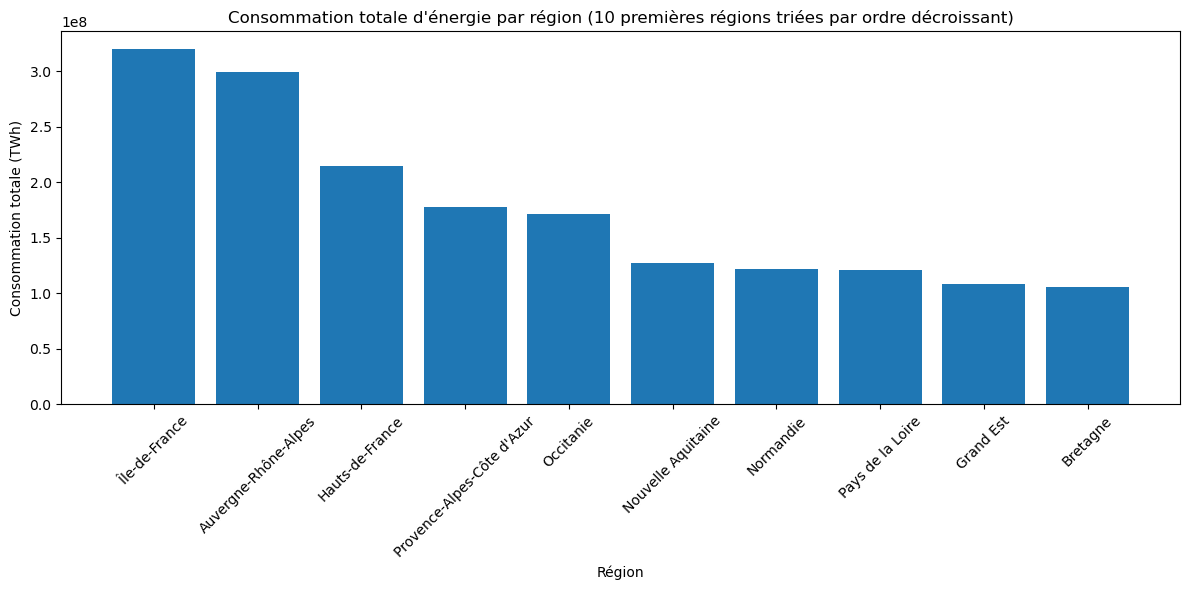

In [80]:
# Tri des données par consommation totale
conso_region_trie = conso_region.sort_values(by='conso_totale_mwh', ascending=False)

# Sélection des 10 premières lignes
conso_region_trie_top10 = conso_region_trie.head(10)

# Affichage du diagramme à barres
#conso_region_trie.plot(kind="line", figsize=(10, 6))
plt.figure(figsize=(12, 6))
plt.bar(conso_region_trie_top10['nom_region'], conso_region_trie_top10['conso_totale_mwh'])  # Utilisation de 'nom_region' pour l'axe des x
plt.title('Consommation totale d\'énergie par région (10 premières régions triées par ordre décroissant)')
plt.xlabel('Région')
plt.ylabel('Consommation totale (TWh)')
plt.xticks(rotation=45)  # Optionnel: faire pivoter les étiquettes des régions pour une meilleure lisibilité
plt.tight_layout()
plt.show()


#### Principales observations

La région la plus énergivore est l'Île-de-France, avec une forte consommation.
Les régions Auvergne-Rhône-Alpes, Hauts-de-France, Provence-Alpes-Côte d'Azur, Occitanie, Nouvelle-Aquitaine et Normandie suivent ensuite, avec des grandes consommations.
Les régions Pays de la Loire, Grand Est et Bretagne ont une consommation d'énergie inférieure à 2,5 GWh.
Analyse plus approfondie

La consommation d'énergie est généralement plus élevée dans les régions les plus peuplées et les plus industrialisées. C'est le cas de l'Île-de-France, qui est la région la plus peuplée de France et qui abrite de nombreuses entreprises et industries.
La consommation d'énergie peut également être influencée par le climat et les ressources énergétiques disponibles. Par exemple, les régions du sud de la France ont une consommation d'énergie plus élevée pour le chauffage, tandis que les régions du nord de la France ont une consommation d'énergie plus élevée pour le refroidissement.
Il est important de noter que ce graphique ne montre que la consommation totale d'énergie par région. Il ne fournit pas d'informations sur la répartition de la consommation par type d'énergie (par exemple, électricité, gaz naturel, pétrole).

Entrez le nom de la region à visualiser :  Pays de la Loire


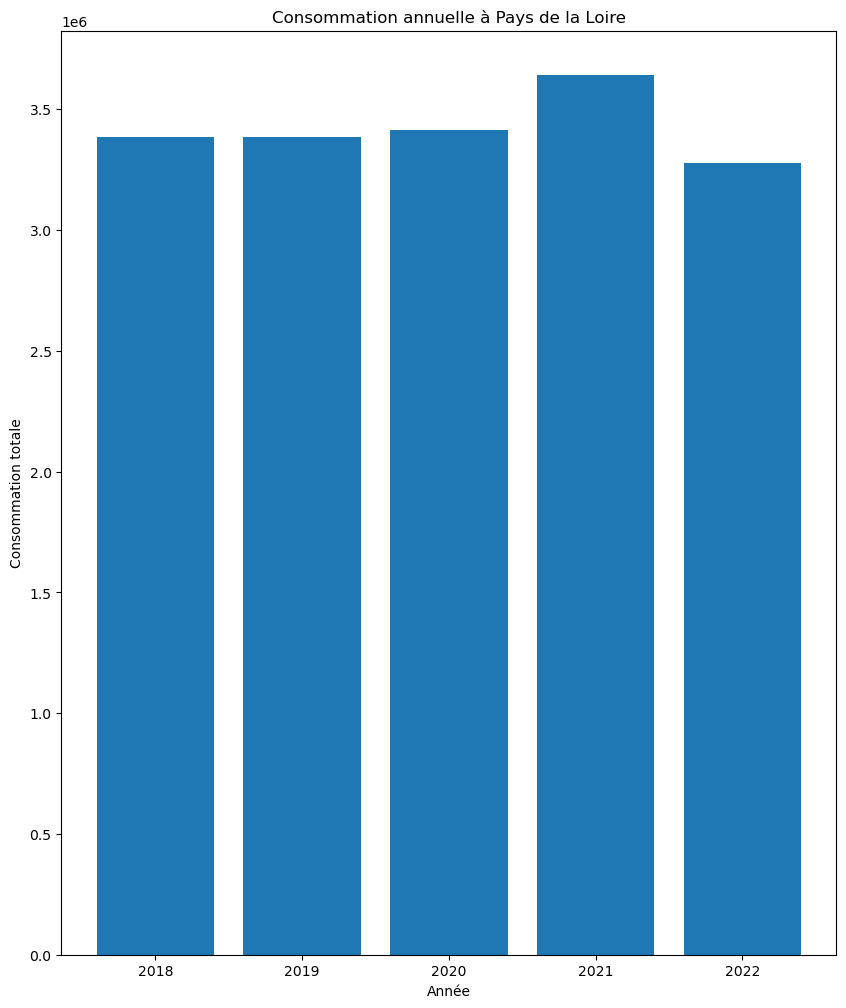

In [81]:
# Fonction pour visualiser la consommation pour region sélectionnée
def visualiser_region(nom_region):
    # Filtrer les données pour la region sélectionnée
    donnees_region = data_elec[data_elec['nom_region'] == nom_region]

    # Calcul de la consommation totale  pour la region
    consommation_totale = donnees_region['conso_totale_mwh'].sum()

    # Création un diagramme en barres pour visualiser la consommation
    plt.figure(figsize=(10, 12))
    plt.bar(donnees_region['annee'], donnees_region['conso_totale_mwh'])
    plt.title(f"Consommation annuelle à {nom_region}")
    plt.xlabel("Année")
    plt.ylabel("Consommation totale")
    plt.show()

# le nom de la region saisi par l'utilisateur
nom_region = input("Entrez le nom de la region à visualiser : ")

# Visualiser la commune sélectionnée
visualiser_region(nom_region)


### Comparaison entre la production et la consommtion :

### Etude commune entre la production et la consommation :

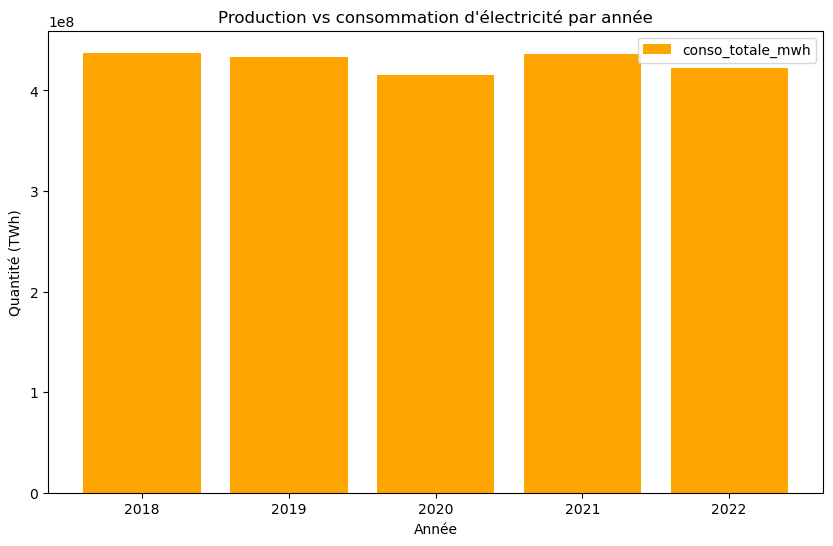

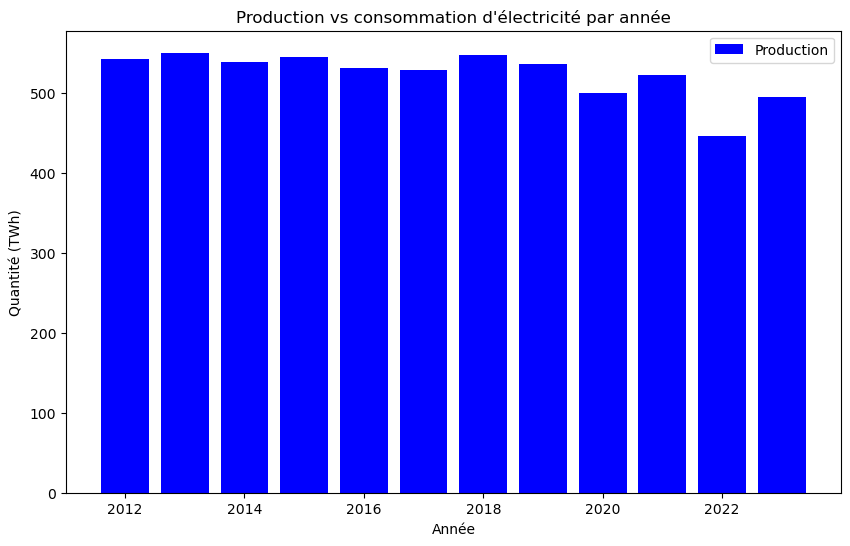

In [82]:
data_prod_annee = data_prod.groupby("annee")["production_totale"].sum()
data_g_annee = data_elec.groupby("annee")["conso_totale_mwh"].sum()

# Création du graphique
plt.figure(figsize=(10, 6))
#plt.bar(data_prod_annee.index, data_prod_annee.values, label="Production", color="blue")
plt.bar(data_g_annee.index, data_g_annee.values, label="conso_totale_mwh", color="orange")
plt.xlabel("Année")
plt.ylabel("Quantité (TWh)")
plt.title("Production vs consommation d'électricité par année")
plt.legend()
plt.show()


data_prod_annee = data_prod.groupby("annee")["production_totale"].sum()
data_g_annee = data_elec.groupby("annee")["conso_totale_mwh"].sum()

# Création du graphique
plt.figure(figsize=(10, 6))
plt.bar(data_prod_annee.index, data_prod_annee.values, label="Production", color="blue")
#plt.bar(data_g_annee.index, data_g_annee.values, label="conso_totale_mwh", color="orange")
plt.xlabel("Année")
plt.ylabel("Quantité (TWh)")
plt.title("Production vs consommation d'électricité par année")
plt.legend()
plt.show()


### l'écart entre la production totale et la consommation totale

In [83]:
# l'écart entre la production totale et la consommation totale
data_prod['ecart_production_consommation'] = data_prod['production_totale'] - data_prod['consommation_totale']

# l'écart entre la production totale et la consommation totale pour chaque année
print(data_prod[['annee', 'ecart_production_consommation']])


    annee  ecart_production_consommation
0    2016                      48.197907
1    2019                      64.066328
2    2020                      51.245983
3    2013                      55.000000
4    2017                      47.218267
5    2023                      56.001142
6    2012                      52.000000
7    2014                      75.060243
8    2015                      70.713590
9    2018                      70.355343
10   2021                      50.912146
11   2022                      -7.589006


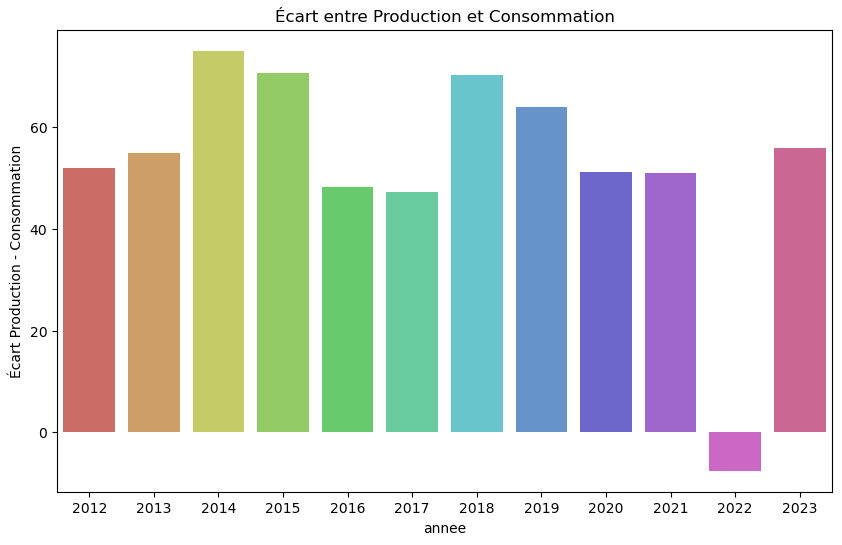

In [84]:
# l'écart entre la production totale et la consommation totale de chauqe annee:
data_prod['ecart_production_consommation'] = data_prod['production_totale'] - data_prod['consommation_totale']

# couleurs pour les barres
palette = sns.color_palette("hls", len(data_prod))

plt.figure(figsize=(10, 6))
sns.barplot(x=data_prod['annee'], y=data_prod['ecart_production_consommation'], color='skyblue', palette=palette)
plt.xlabel('annee')
plt.ylabel('Écart Production - Consommation')
plt.title('Écart entre Production et Consommation')

plt.show()


#### Écart positif

Un écart positif indique que la production d'électricité a été supérieure à la consommation pour l'année en question. Cela signifie que la France a exporté de l'électricité vers d'autres pays.

#### Écart négatif

Un écart négatif indique que la production d'électricité a été inférieure à la consommation pour l'année en question. Cela signifie que la France a importé de l'électricité d'autres pays.

Dans le tableau, on observe un écart négatif pour l'année 2022 :

2022 : -7.589006 GWh

#### Analyse des données

En analysant les données du tableau, on peut observer que la France a été un net exportateur d'électricité au cours de la période étudiée (de 2012 à 2023), à l'exception de l'année 2022 où elle a été un importateur net.

Cette tendance s'explique par plusieurs facteurs, notamment :

La forte présence de sources d'énergie renouvelables en France, telles que l'hydraulique et le nucléaire, qui produisent de l'électricité à un coût relativement bas.

Une consommation d'électricité relativement stable en France, qui n'a pas augmenté de manière significative au cours de la période étudiée.

### Production et consommation d\'électricité au fil du temps

C:\Users\soule\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\soule\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


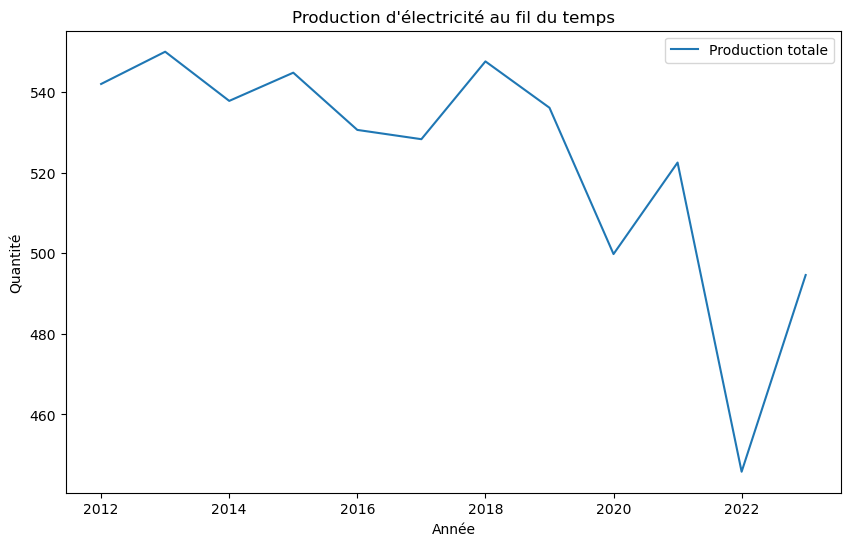

C:\Users\soule\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\soule\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


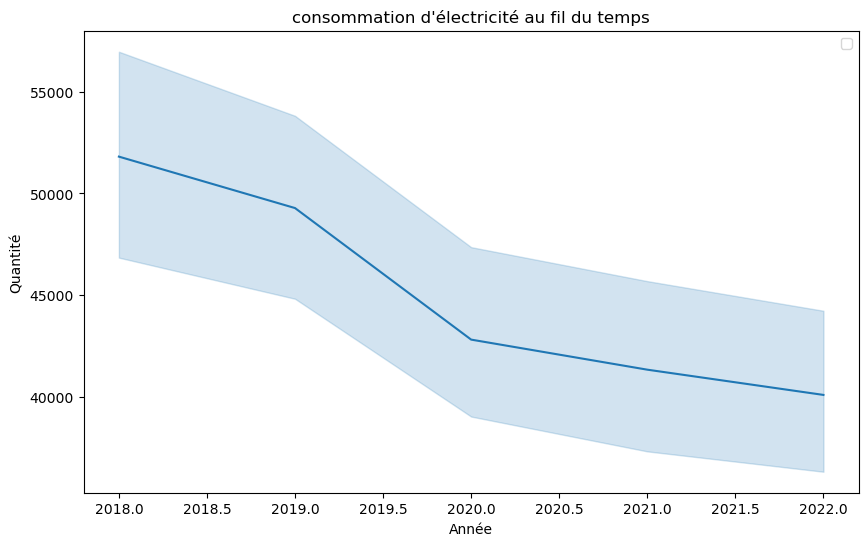

In [85]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='annee', y='production_totale', data=data_prod, label='Production totale')
#sns.lineplot(x='annee', y='conso_totale_mwh', data=data_elec)
plt.xlabel('Année')
plt.ylabel('Quantité')
plt.title('Production d\'électricité au fil du temps')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
#sns.lineplot(x='annee', y='production_totale', data=data_prod, label='Production totale')
sns.lineplot(x='annee', y='conso_totale_mwh', data=data_elec)
plt.xlabel('Année')
plt.ylabel('Quantité')
plt.title('consommation d\'électricité au fil du temps')
plt.legend()
plt.show()

# Le coût d'electricité :

In [86]:
# Chargement des données de cout d'electricité:

data_cout_elec = pd.read_csv("prix_elec.csv", sep=";")

# Chargement des données de coût d'électricité
data_cout_elec = pd.read_csv("prix_elec.csv", sep=";")

data_cout_elec

,DATE_DEBUT,DATE_FIN,P_SOUSCRITE,PART_FIXE_HT,PART_FIXE_TTC,PART_VARIABLE_HT,PART_VARIABLE_TTC
0,23/07/2012,31/07/2013,3,"55,56","69,37","0,0822","0,1256"
1,23/07/2012,31/07/2013,6,"65,64","82,98","0,0828","0,1263"
2,23/07/2012,31/07/2013,9,"76,08","96,97","0,0848","0,1287"
3,23/07/2012,31/07/2013,12,"118,08","153,7","0,0848","0,1287"
4,23/07/2012,31/07/2013,15,"135,72","177,66","0,0848","0,1287"
...,...,...,...,...,...,...,...
90,01/02/2024,NaN,3,"95,88","116,04","0,1887","0,2516"
91,01/02/2024,NaN,6,"123,72","151,86","0,1887","0,2516"
92,01/02/2024,NaN,9,"154,08","190,91","0,1887","0,2516"
93,01/02/2024,NaN,12,"185,16","230,89","0,1887","0,2516"


In [87]:
data_cout_elec.head(5)

,DATE_DEBUT,DATE_FIN,P_SOUSCRITE,PART_FIXE_HT,PART_FIXE_TTC,PART_VARIABLE_HT,PART_VARIABLE_TTC
0,23/07/2012,31/07/2013,3,"55,56","69,37","0,0822","0,1256"
1,23/07/2012,31/07/2013,6,"65,64","82,98","0,0828","0,1263"
2,23/07/2012,31/07/2013,9,"76,08","96,97","0,0848","0,1287"
3,23/07/2012,31/07/2013,12,"118,08","153,7","0,0848","0,1287"
4,23/07/2012,31/07/2013,15,"135,72","177,66","0,0848","0,1287"


In [88]:
# Afficher les colonnes :
data_cout_elec.columns


Index(['DATE_DEBUT', 'DATE_FIN', 'P_SOUSCRITE', 'PART_FIXE_HT',
       'PART_FIXE_TTC', 'PART_VARIABLE_HT', 'PART_VARIABLE_TTC'],
      dtype='object')

In [89]:
# Analyse descriptive - Moyenne, médiane pour les variables numériques
data_cout_elec.describe()

,P_SOUSCRITE
count,95.000000
mean,9.000000
std,4.265148
min,3.000000
25%,6.000000
50%,9.000000
75%,12.000000
max,15.000000


In [90]:
# Vérification des valeurs manquantes par colonne
data_cout_elec.isnull().sum()

DATE_DEBUT           0
DATE_FIN             5
P_SOUSCRITE          0
PART_FIXE_HT         0
PART_FIXE_TTC        0
PART_VARIABLE_HT     0
PART_VARIABLE_TTC    0
dtype: int64

In [91]:
data_cout_elec.dtypes

DATE_DEBUT           object
DATE_FIN             object
P_SOUSCRITE           int64
PART_FIXE_HT         object
PART_FIXE_TTC        object
PART_VARIABLE_HT     object
PART_VARIABLE_TTC    object
dtype: object

In [92]:
data_cout_elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DATE_DEBUT         95 non-null     object
 1   DATE_FIN           90 non-null     object
 2   P_SOUSCRITE        95 non-null     int64 
 3   PART_FIXE_HT       95 non-null     object
 4   PART_FIXE_TTC      95 non-null     object
 5   PART_VARIABLE_HT   95 non-null     object
 6   PART_VARIABLE_TTC  95 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.3+ KB


In [93]:
data_cout_elec.fillna(0)
data_cout_elec

,DATE_DEBUT,DATE_FIN,P_SOUSCRITE,PART_FIXE_HT,PART_FIXE_TTC,PART_VARIABLE_HT,PART_VARIABLE_TTC
0,23/07/2012,31/07/2013,3,"55,56","69,37","0,0822","0,1256"
1,23/07/2012,31/07/2013,6,"65,64","82,98","0,0828","0,1263"
2,23/07/2012,31/07/2013,9,"76,08","96,97","0,0848","0,1287"
3,23/07/2012,31/07/2013,12,"118,08","153,7","0,0848","0,1287"
4,23/07/2012,31/07/2013,15,"135,72","177,66","0,0848","0,1287"
...,...,...,...,...,...,...,...
90,01/02/2024,NaN,3,"95,88","116,04","0,1887","0,2516"
91,01/02/2024,NaN,6,"123,72","151,86","0,1887","0,2516"
92,01/02/2024,NaN,9,"154,08","190,91","0,1887","0,2516"
93,01/02/2024,NaN,12,"185,16","230,89","0,1887","0,2516"


C:\Users\soule\AppData\Local\Temp\ipykernel_7976\110155246.py:8: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_cout_elec['DATE_DEBUT'] = pd.to_datetime(data_cout_elec['DATE_DEBUT'])


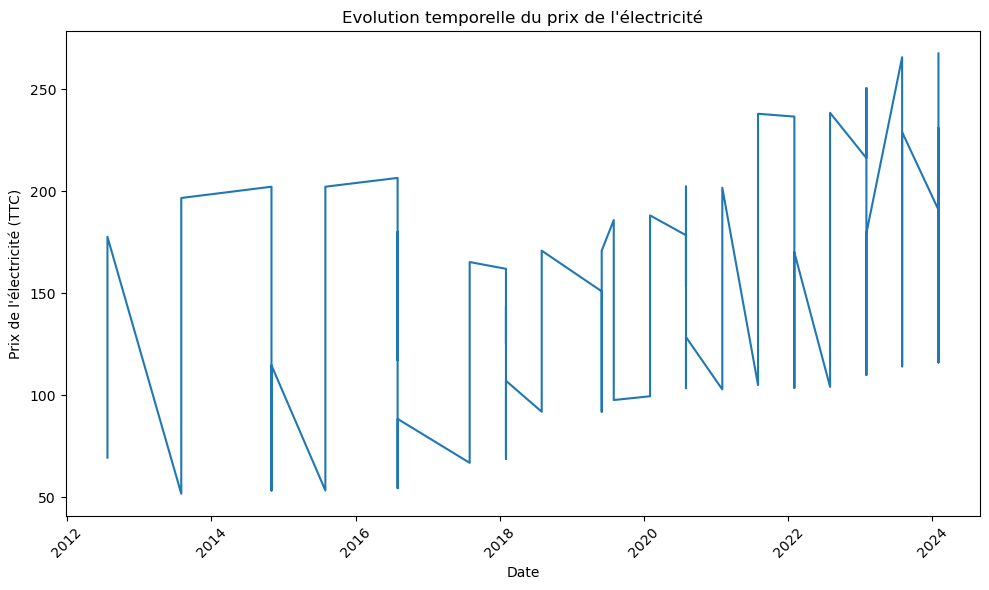

In [94]:

# Chargement des données de coût d'électricité
data_cout_elec = pd.read_csv("prix_elec.csv", sep=";")

# Convertir les virgules en points dans la colonne 'PART_FIXE_TTC' et convertir en float
data_cout_elec['PART_FIXE_TTC'] = data_cout_elec['PART_FIXE_TTC'].str.replace(',', '.').astype(float)

# Convertir la colonne de dates en format datetime
data_cout_elec['DATE_DEBUT'] = pd.to_datetime(data_cout_elec['DATE_DEBUT'])

# Trier les données par date
data_cout_elec.sort_values(by='DATE_DEBUT', inplace=True)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(data_cout_elec['DATE_DEBUT'], data_cout_elec['PART_FIXE_TTC'], linestyle='-')
plt.title("Evolution temporelle du prix de l'électricité")
plt.xlabel("Date")
plt.ylabel("Prix de l'électricité (TTC)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [95]:
# Chargement des données de coût d'électricité en spécifiant le séparateur décimal
data_cout_elec = pd.read_csv("prix_elec.csv", sep=";", decimal=",")

# Calcul des prix moyens
prix_fixe_moyen_ht = data_cout_elec['PART_FIXE_HT'].mean()
prix_fixe_moyen_ttc = data_cout_elec['PART_FIXE_TTC'].mean()
prix_variable_moyen_ht = data_cout_elec['PART_VARIABLE_HT'].mean()
prix_variable_moyen_ttc = data_cout_elec['PART_VARIABLE_TTC'].mean()

# Affichage des résultats
print("Prix moyen de la part fixe (HT) :", prix_fixe_moyen_ht)
print("Prix moyen de la part fixe (TTC) :", prix_fixe_moyen_ttc)
print("Prix moyen de la part variable (HT) :", prix_variable_moyen_ht)
print("Prix moyen de la part variable (TTC) :", prix_variable_moyen_ttc)


Prix moyen de la part fixe (HT) : 116.69431578947366
Prix moyen de la part fixe (TTC) : 146.82494736842105
Prix moyen de la part variable (HT) : 0.11249368421052637
Prix moyen de la part variable (TTC) : 0.16403894736842106


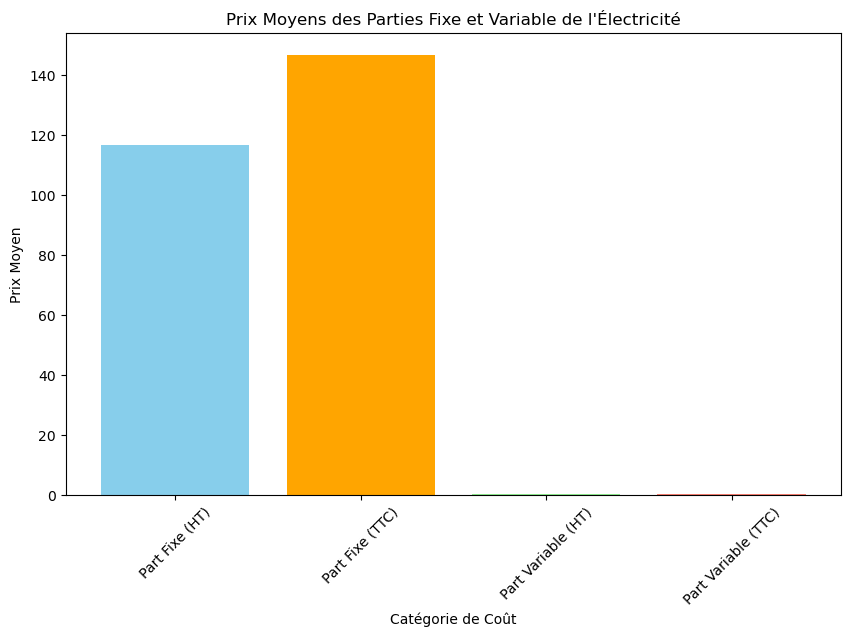

In [96]:

# Chargement des données de coût d'électricité en spécifiant le séparateur décimal
data_cout_elec = pd.read_csv("prix_elec.csv", sep=";", decimal=",")

# Calcul des prix moyens
prix_fixe_moyen_ht = data_cout_elec['PART_FIXE_HT'].mean()
prix_fixe_moyen_ttc = data_cout_elec['PART_FIXE_TTC'].mean()
prix_variable_moyen_ht = data_cout_elec['PART_VARIABLE_HT'].mean()
prix_variable_moyen_ttc = data_cout_elec['PART_VARIABLE_TTC'].mean()

# Création du graphique à barres
categories = ['Part Fixe (HT)', 'Part Fixe (TTC)', 'Part Variable (HT)', 'Part Variable (TTC)']
prix_moyens = [prix_fixe_moyen_ht, prix_fixe_moyen_ttc, prix_variable_moyen_ht, prix_variable_moyen_ttc]

plt.figure(figsize=(10, 6))
plt.bar(categories, prix_moyens, color=['skyblue', 'orange', 'lightgreen', 'salmon'])
plt.xlabel('Catégorie de Coût')
plt.ylabel('Prix Moyen')
plt.title('Prix Moyens des Parties Fixe et Variable de l\'Électricité')
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité

plt.show()


C:\Users\soule\AppData\Local\Temp\ipykernel_7976\515983242.py:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_cout_elec['DATE_FIN'] = pd.to_datetime(data_cout_elec['DATE_FIN'])


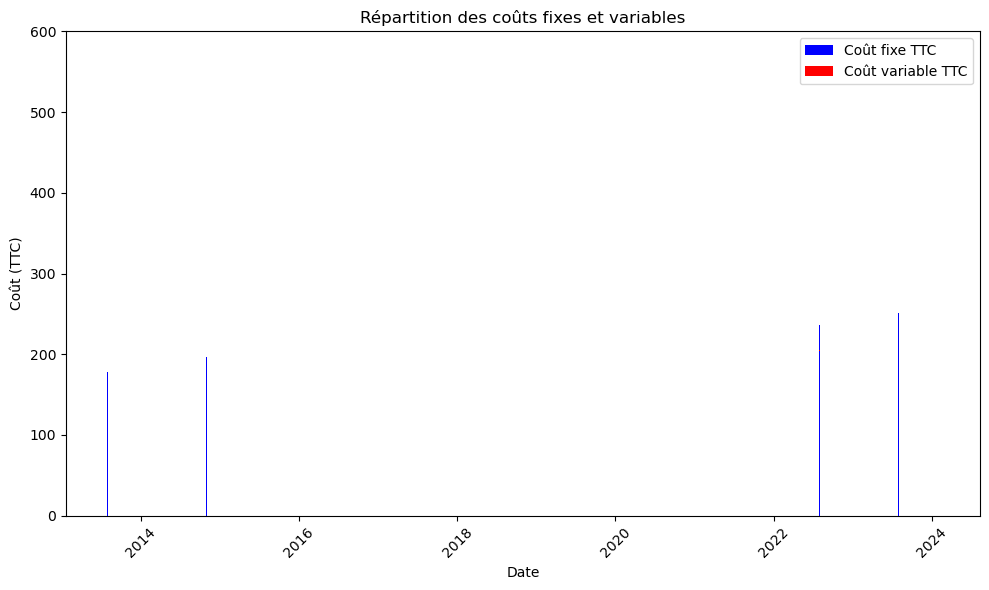

In [97]:
# Chargement des données de coût d'électricité en spécifiant le séparateur décimal
data_cout_elec = pd.read_csv("prix_elec.csv", sep=";", decimal=",")

# Convertir les colonnes de prix en float
data_cout_elec['PART_FIXE_TTC'] = data_cout_elec['PART_FIXE_TTC'].astype(float)
data_cout_elec['PART_VARIABLE_TTC'] = data_cout_elec['PART_VARIABLE_TTC'].astype(float)

# Convertir la colonne 'DATE_FIN' en format datetime
data_cout_elec['DATE_FIN'] = pd.to_datetime(data_cout_elec['DATE_FIN'])

# Créer un graphique à barres empilées
plt.figure(figsize=(10, 6))
plt.bar(data_cout_elec['DATE_FIN'], data_cout_elec['PART_FIXE_TTC'], label='Coût fixe TTC', color='b')
plt.bar(data_cout_elec['DATE_FIN'], data_cout_elec['PART_VARIABLE_TTC'], bottom=data_cout_elec['PART_FIXE_TTC'], label='Coût variable TTC', color='r')

# Ajouter des légendes et des étiquettes
plt.title('Répartition des coûts fixes et variables')
plt.xlabel('Date')
plt.ylabel('Coût (TTC)')
plt.xticks(rotation=45)
plt.ylim(0, 600)  # Définir les limites de l'axe y
plt.legend()
plt.tight_layout()
plt.show()


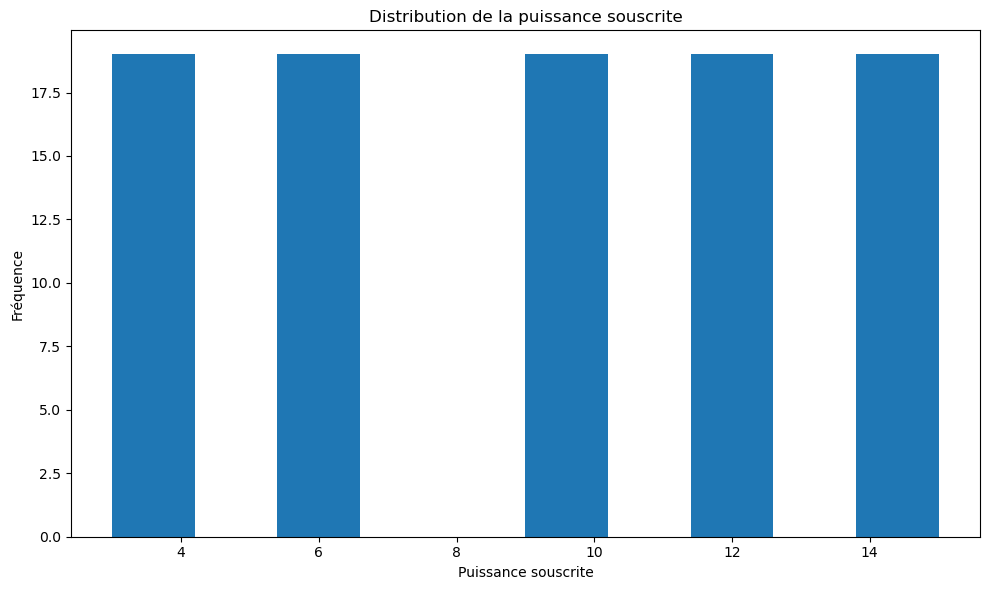

In [98]:
# Créer un histogramme pour montrer la distribution de la puissance souscrite
plt.figure(figsize=(10, 6))
plt.hist(data_cout_elec['P_SOUSCRITE'])

# Ajouter des légendes et des étiquettes
plt.title('Distribution de la puissance souscrite')
plt.xlabel('Puissance souscrite')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()


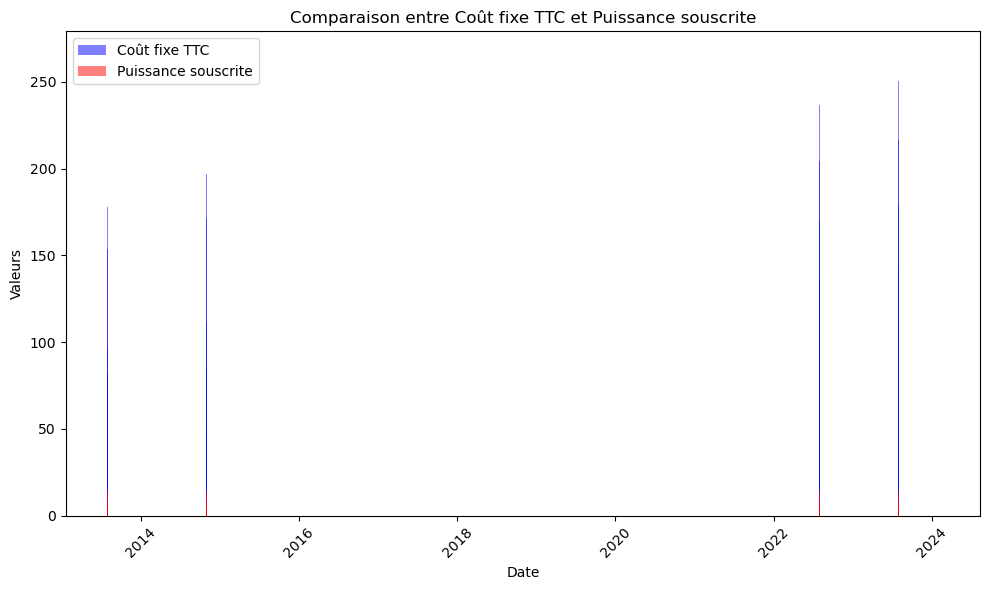

In [99]:
plt.figure(figsize=(10, 6))
plt.bar(data_cout_elec['DATE_FIN'], data_cout_elec['PART_FIXE_TTC'], label='Coût fixe TTC', color='b', alpha=0.5)
plt.bar(data_cout_elec['DATE_FIN'], data_cout_elec['P_SOUSCRITE'], label='Puissance souscrite', color='r', alpha=0.5)

# Ajouter des légendes et des étiquettes
plt.title('Comparaison entre Coût fixe TTC et Puissance souscrite')
plt.xlabel('Date')
plt.ylabel('Valeurs')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


### cout de l'énergie des producteurs et distributeurs de l'energie :

In [100]:

separateur = ";"

# Lecture du fichier CSV dans un DataFrame
cout_prod = pd.read_csv("cout_prode.csv", sep=separateur)

# Afficher les premières lignes du DataFrame
print(cout_prod.head())

   territoire  statut                 date_heure  production_totale_mw  \
0       Corse  Validé  2015-12-31T23:00:00+00:00            325.628703   
1      Guyane  Validé  2015-12-31T23:00:00+00:00             91.176671   
2  Martinique  Validé  2015-12-31T23:00:00+00:00            154.276000   
3  Guadeloupe  Validé  2015-12-31T23:00:00+00:00            171.950387   
4     Réunion  Validé  2015-12-31T23:00:00+00:00            285.583802   

   thermique_mw  bagasse_charbon_mw  hydraulique_mw  micro_hydraulique_mw  \
0    175.261507                 NaN        4.561752              4.771676   
1     54.484771                 NaN       35.887500                   NaN   
2    153.882000                 NaN             NaN                   NaN   
3     76.011615              67.441        4.295075                   NaN   
4     38.215448             156.510       86.874103                   NaN   

   photovoltaique_mw  eolien_mw  bioenergies_mw  geothermie_mw  \
0          -0.042256   0.2

In [101]:
cout_prod.columns

Index(['territoire', 'statut', 'date_heure', 'production_totale_mw',
       'thermique_mw', 'bagasse_charbon_mw', 'hydraulique_mw',
       'micro_hydraulique_mw', 'photovoltaique_mw', 'eolien_mw',
       'bioenergies_mw', 'geothermie_mw', 'importations_mw',
       'cout_moyen_de_production_eur_mwh'],
      dtype='object')

In [102]:
print(cout_prod.head())

   territoire  statut                 date_heure  production_totale_mw  \
0       Corse  Validé  2015-12-31T23:00:00+00:00            325.628703   
1      Guyane  Validé  2015-12-31T23:00:00+00:00             91.176671   
2  Martinique  Validé  2015-12-31T23:00:00+00:00            154.276000   
3  Guadeloupe  Validé  2015-12-31T23:00:00+00:00            171.950387   
4     Réunion  Validé  2015-12-31T23:00:00+00:00            285.583802   

   thermique_mw  bagasse_charbon_mw  hydraulique_mw  micro_hydraulique_mw  \
0    175.261507                 NaN        4.561752              4.771676   
1     54.484771                 NaN       35.887500                   NaN   
2    153.882000                 NaN             NaN                   NaN   
3     76.011615              67.441        4.295075                   NaN   
4     38.215448             156.510       86.874103                   NaN   

   photovoltaique_mw  eolien_mw  bioenergies_mw  geothermie_mw  \
0          -0.042256   0.2

In [103]:
cout_prod.fillna(0)

,territoire,statut,date_heure,production_totale_mw,thermique_mw,bagasse_charbon_mw,hydraulique_mw,micro_hydraulique_mw,photovoltaique_mw,eolien_mw,bioenergies_mw,geothermie_mw,importations_mw,cout_moyen_de_production_eur_mwh
0,Corse,Validé,2015-12-31T23:00:00+00:00,325.628703,175.261507,0.000,4.561752,4.771676,-0.042256,0.228256,1.829167,0.000000,139.0186,196.76
1,Guyane,Validé,2015-12-31T23:00:00+00:00,91.176671,54.484771,0.000,35.887500,0.000000,0.000000,0.000000,0.804400,0.000000,0.0000,313.83
2,Martinique,Validé,2015-12-31T23:00:00+00:00,154.276000,153.882000,0.000,0.000000,0.000000,-0.088000,0.485000,-0.003000,0.000000,0.0000,298.79
3,Guadeloupe,Validé,2015-12-31T23:00:00+00:00,171.950387,76.011615,67.441,4.295075,0.000000,0.000000,13.663990,0.000000,10.538708,0.0000,191.00
4,Réunion,Validé,2015-12-31T23:00:00+00:00,285.583802,38.215448,156.510,86.874103,0.000000,-0.582000,3.312250,1.254000,0.000000,0.0000,152.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306835,Réunion,Estimé,0,304.090000,178.210000,86.270,40.550000,0.000000,-0.940000,0.000000,0.000000,0.000000,0.0000,0.00
306836,Réunion,Estimé,0,262.900000,168.730000,77.790,17.300000,0.000000,-0.920000,0.000000,0.000000,0.000000,0.0000,0.00
306837,Réunion,Estimé,0,392.390000,142.480000,76.530,57.890000,0.000000,114.270000,1.220000,0.000000,0.000000,0.0000,0.00
306838,Réunion,Estimé,0,383.380000,154.830000,110.430,51.870000,0.000000,66.250000,0.000000,0.000000,0.000000,0.0000,0.00


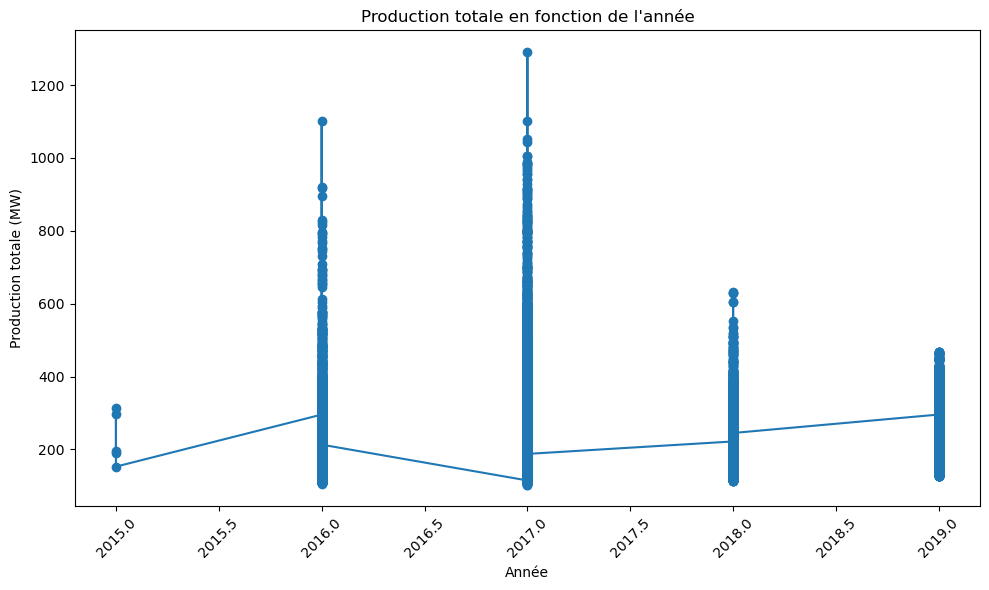

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Lecture du fichier CSV dans un DataFrame
cout_prod = pd.read_csv("cout_prode.csv", sep=";")

# Conversion de la colonne 'date_heure' en datetime
cout_prod['date_heure'] = pd.to_datetime(cout_prod['date_heure'])

# Extraction de l'année
cout_prod['annee'] = cout_prod['date_heure'].dt.year

# Visualisation de la production totale en fonction de l'année
plt.figure(figsize=(10, 6))
plt.plot(cout_prod['annee'], cout_prod['cout_moyen_de_production_eur_mwh'], marker='o', linestyle='-')
plt.title('Production totale en fonction de l\'année')
plt.xlabel('Année')
plt.ylabel('Production totale (MW)')
plt.xticks(rotation=45)  # La rotation est appliquée aux années
plt.tight_layout()
plt.show()


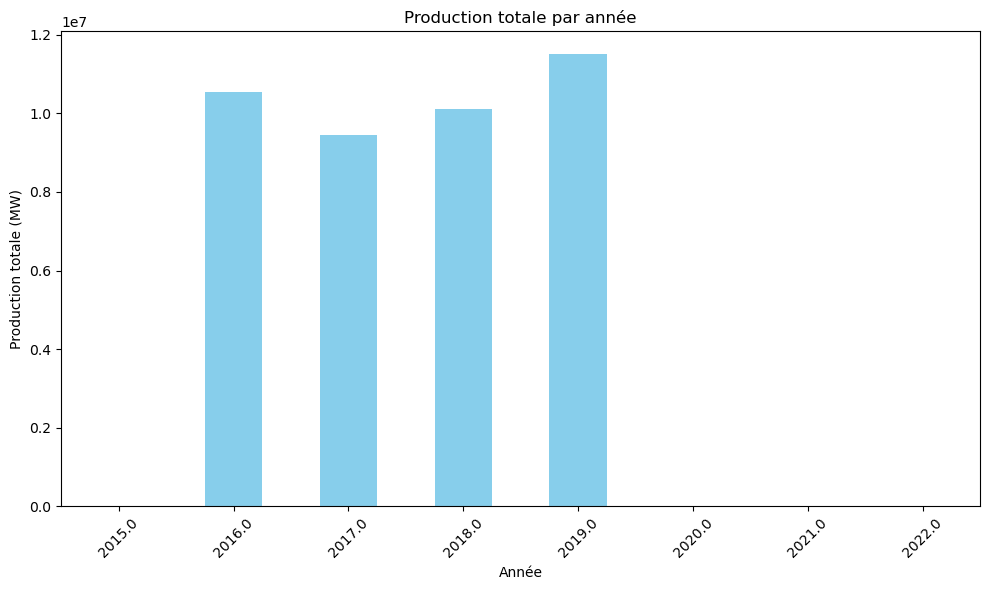

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Lecture du fichier CSV dans un DataFrame
cout_prod = pd.read_csv("cout_prode.csv", sep=";")

# Conversion de la colonne 'date_heure' en datetime
cout_prod['date_heure'] = pd.to_datetime(cout_prod['date_heure'])

# Extraction de l'année
cout_prod['annee'] = cout_prod['date_heure'].dt.year

# Calcul de la production totale par année
production_par_annee = cout_prod.groupby('annee')['cout_moyen_de_production_eur_mwh'].sum()

# Visualisation de la production totale en fonction de l'année avec un graphique de barres
plt.figure(figsize=(10, 6))
production_par_annee.plot(kind='bar', color='skyblue')
plt.title('Production totale par année')
plt.xlabel('Année')
plt.ylabel('Production totale (MW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
